In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=d1fe418f7778c16f8f5702ea9eb09a20ded4f00c15b8dbbd6077b7addc0b7a08
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [ ]:
! pip install stylecloud

In [94]:
import json
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

In [6]:
raw_data = []

# Open the JSON file and read it line by line
with open('/content/drive/My Drive/Dataset/NLP_resume_Extraction/Resume.json','r') as f:
    for line in f:
        # Parse each line as JSON and append it to the data list
        raw_data.append(json.loads(line))

In [7]:
print(f"Number of records loaded: {len(raw_data)}")

Number of records loaded: 200


# **Data Understanding**


**Type of Data:**

The data provided is a JSON structure containing resume information.


**``content:``** A string with the full text of the resume.

**``annotation:``** A list of dictionaries containing labels, text spans, and other metadata about the resume content.

Each labeled entity contains the following fields:

**``label:``** the type of entity ('Companies worked at','Name')

``Name:`` The name of the person.

``Email Address:`` Email address of the person.

``Skills:`` Technical skills of the person.

``College Name:`` The name of the college or university the person attended.

``Degree:`` The qualification obtained by the person.

``Designation:`` Job title or designation of the person.

``Companies worked at:`` Companies where the person has worked.

``Location:`` The location of the person.

``Graduation Year:`` Graduation year.

``Year of experience :`` The total years of experience.

**``points:``** a list of character offsets indicating the ``start`` and ``end`` positions of the entity in the resume text. It also includes the corresponding entity text

# Data Cleaning and transformation

In [8]:
df = pd.DataFrame(raw_data)

**Missing Values**

There are 0 missing 'content' values. But further investigation shows that there are 2 emptly labels for the records Record 61, Record 147



In [9]:
missing_values = df['content'].isnull().sum()
print('Missing_Values',missing_values)

Missing_Values 0


In [10]:
def identify_records_with_missing_labels(df, annotation_column):
    """
    Identifies records in the DataFrame that have missing or empty labels in the specified annotation column.

    Args:
        df (pd.DataFrame): The DataFrame containing the annotations.
        annotation_column (str): The name of the column that contains the annotations.

    Returns:
        list: A list of indices of records with missing or empty labels.
    """
    missing_labels_records = []
    for i, annotations in enumerate(df[annotation_column]):
        for annotation in annotations:
            if not annotation['label']:
                missing_labels_records.append(i)
                break  # Stop after finding the first empty label in this record

    return missing_labels_records

In [11]:
missing_labels_records = identify_records_with_missing_labels(df, 'annotation')

# Print the records with missing labels
print("Records with missing labels:")
for record_idx in missing_labels_records:
    print(f"Record {record_idx}")

Records with missing labels:
Record 61
Record 147


In [12]:
import pandas as pd
from collections import Counter

def analyze_missing_annotations(df):
    """
    Analyzes the DataFrame to count records with missing or empty annotations and labels.

    Args:
        df (pd.DataFrame): A DataFrame containing an 'annotation' column with annotations.

    Returns:
        dict: A dictionary containing counts of missing annotations, missing entities, and records with empty labels and text.
    """
    # Initialize counters
    missing_entities_count = Counter()
    missing_annotation_count = 0
    records_with_empty_label_and_text = []

    # Iterate through the records
    for index, record in df.iterrows():
        annotations = record['annotation']
        if not annotations:  # Check if the annotations list is empty or None
            missing_annotation_count += 1
        else:
            # Check if the annotation contains any entities
            for annotation in annotations:
                if not annotation['label']:
                    print('\n #annotation#', annotation)
                    print('\nfetched record #', annotations)
                    missing_entities_count.update(['empty_label'])
                    for point in annotation['points']:
                        if not point['text']:
                            records_with_empty_label_and_text.append(index)

    # Return the results as a dictionary
    dict_1 =  {
        "missing_annotation_count": missing_annotation_count,
        "missing_entities_count": missing_entities_count,
        "records_with_empty_label_and_text": records_with_empty_label_and_text
    }

    print("Number of records with missing or empty annotations:", dict_1["missing_annotation_count"])
    print("Missing entities count:", dict_1["missing_entities_count"])
    print("Records with empty label and text missing:", len(dict_1["records_with_empty_label_and_text"]))


In [13]:
missing_data = analyze_missing_annotations(df)


 #annotation# {'label': [], 'points': [{'start': 2585, 'end': 2590, 'text': 'Oracle'}]}

fetched record # [{'label': ['Companies worked at'], 'points': [{'start': 5365, 'end': 5370, 'text': 'Oracle'}]}, {'label': ['Companies worked at'], 'points': [{'start': 5318, 'end': 5323, 'text': 'Oracle'}]}, {'label': ['Companies worked at'], 'points': [{'start': 4676, 'end': 4681, 'text': 'Oracle'}]}, {'label': ['Designation'], 'points': [{'start': 4613, 'end': 4632, 'text': 'Technical Consultant'}]}, {'label': ['Companies worked at'], 'points': [{'start': 4407, 'end': 4412, 'text': 'Oracle'}]}, {'label': ['Companies worked at'], 'points': [{'start': 4374, 'end': 4397, 'text': 'Oracle Fusion Middleware'}]}, {'label': ['Companies worked at'], 'points': [{'start': 4374, 'end': 4379, 'text': 'Oracle'}]}, {'label': ['Designation'], 'points': [{'start': 4328, 'end': 4347, 'text': 'Technical Consultant'}]}, {'label': ['Companies worked at'], 'points': [{'start': 4210, 'end': 4215, 'text': 'Oracle'}]}

In [14]:
df_cleaned = df[~df.index.isin(missing_labels_records)]

In [15]:
missing_data_cleaned_df = analyze_missing_annotations(df_cleaned)

Number of records with missing or empty annotations: 0
Missing entities count: Counter()
Records with empty label and text missing: 0


# Duplicate Records

Out of 200 records, only 1 record is duplicated. So we can remove that duplicated record.

In [16]:
Duplicate_records= df_cleaned['content'].duplicated().sum()
print('Duplicate_records',Duplicate_records)


Duplicate_records 1


In [17]:
#Fetch all duplicate values
duplicate=df_cleaned[df_cleaned['content'].duplicated(keep='last')]
duplicate.head()

,content,annotation
52,Sameer Kujur\nOrrisha - Email me on Indeed: in...,"[{'label': ['Email Address'], 'points': [{'sta..."


In [18]:
# Remove Duplicate Records
df_cleaned = df_cleaned.drop_duplicates(subset='content', keep='first')

# Verify that duplicates have been removed
num_duplicates = df_cleaned['content'].duplicated().sum()
print("Number of duplicate records after cleaning:", num_duplicates)

Number of duplicate records after cleaning: 0


In [19]:
df_cleaned['content'].duplicated().sum()

0

In [20]:
df_cleaned.to_json('/content/drive/My Drive/Dataset/NLP_resume_Extraction/resumes_cleaned.json', orient='records', lines=True)

data = []

# Open the JSON file and read it line by line
with open('/content/drive/My Drive/Dataset/NLP_resume_Extraction/Resume.json','r') as f:
    for line in f:
        # Parse each line as JSON and append it to the data list
        data.append(json.loads(line))


In [21]:
df = pd.DataFrame(data)

# Skew
Unlike numerical data,Skew is not directly applicable to raw text data.However, we can use different appoarch to find the skewness, which can be done while performing EDA.

Below are the few approaches:

Understand Entity Distribution: Identify how frequently each entity or category appears in the dataset.
Visualize Entity Distribution: Use visualizations like bar charts or pie charts to see the distribution.
Calculate Skewness: Use statistical methods to calculate skewness and identify overrepresented or underrepresented categories.
Address Skewness: Implement techniques to handle skewness, such as resampling or augmentation.

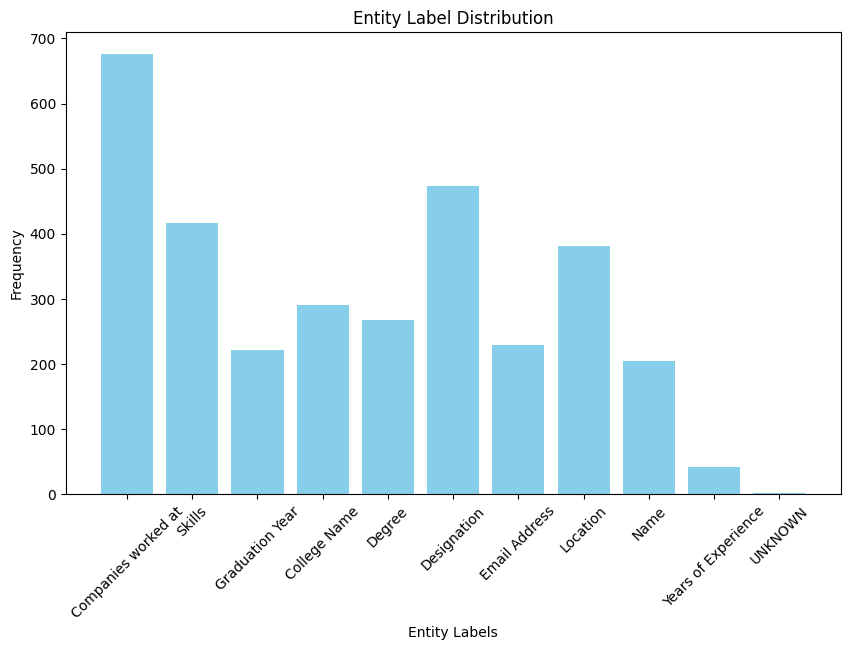

In [22]:
# Analyze entity distribution
entity_freq = Counter()
for record in df['annotation']:
    for annotation in record:
        labels = annotation['label']
        entity_freq.update(labels)

# Plot entity distribution
labels, counts = zip(*entity_freq.items())
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Entity Labels')
plt.ylabel('Frequency')
plt.title('Entity Label Distribution')
plt.xticks(rotation=45)
plt.show()

In [23]:
from scipy.stats import skew

# Calculate skewness
entity_counts = list(entity_freq.values())
entity_skewness = skew(entity_counts)

print("Entity Label Skewness:", entity_skewness)

Entity Label Skewness: 0.36540813195451866


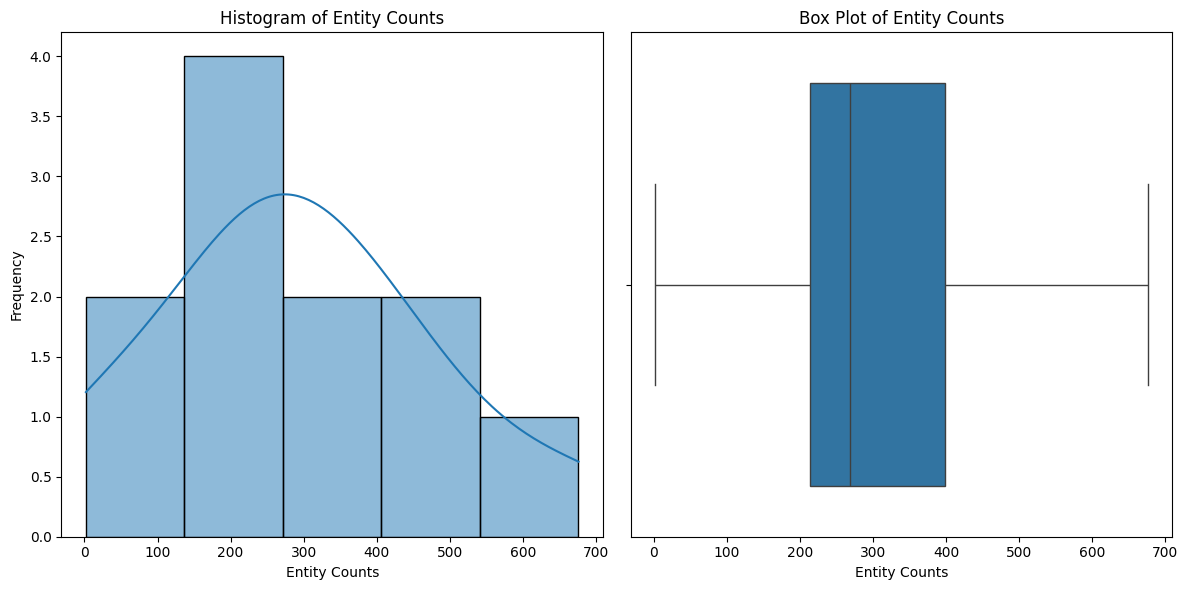

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution with a histogram
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(entity_counts, kde=True)
plt.title('Histogram of Entity Counts')
plt.xlabel('Entity Counts')
plt.ylabel('Frequency')

# Visualize the distribution with a box plot
plt.subplot(1, 2, 2)
sns.boxplot(x=entity_counts)
plt.title('Box Plot of Entity Counts')
plt.xlabel('Entity Counts')

plt.tight_layout()
plt.show()


# Data Preprocessing

In [25]:
def get_annotation(annotaionList, label):
    ReqList = []
    for annotations in annotaionList:
        found = False
        for annot_dict in annotations:
            if annot_dict['label'] == [label]:
                ReqList.append(annot_dict['points'][0]["text"])
                found = True
                break
        if not found:
            ReqList.append(None)
    return ReqList

In [26]:
#Get all the content and annotation data as list
content = []
all_annotaions = []
for line in data:
    content.append(line["content"])
    all_annotaions.append(line["annotation"])

In [27]:
#List_of_email = get_annotation(all_annotaions,"Email Address")
List_of_Names = get_annotation(all_annotaions, "Name")
List_of_Skills = get_annotation(all_annotaions, "Skills")
List_of_companies_worked_at = get_annotation(all_annotaions, "Companies worked at")
List_Years_of_Experience = get_annotation(all_annotaions, "Years of Experience")
List_of_Designation = get_annotation(all_annotaions, "Designation")

In [28]:
def create_dataframe(title, data_list):
    # Remove None values and count frequencies
    data_list = [data for data in data_list if data is not None]
    counter = Counter(data_list)

    # Create DataFrame
    df = pd.DataFrame(counter.items(), columns=[title, 'Count'])
    return df



df_companies_worked_at = create_dataframe('Companies worked at', List_of_companies_worked_at)
df_skills = create_dataframe('Skills',List_of_Skills)

# Display the DataFrames
#print(df_location)

#print(df_companies_worked_at)


Remove newline characters

In [29]:
def remove_newlines_from_column(df, column_name):
    df[column_name] = df[column_name].str.replace('\n', ' ', regex=False)
    return df


In [30]:
import re

def remove_punctuation(text):
    pattern = r'[^\w\s]'
    return re.sub(pattern, '', text)

In [31]:
List_of_Degree = get_annotation(all_annotaions, "Degree")
df_degree = create_dataframe('Degree', List_of_Degree)

In [32]:
df_degree.sample(5)

,Degree,Count
150,M.D.,1
71,Bachelor of Engineering in Electronics and Com...,1
32,Computer Networking,1
63,Bachelor of Technology in Electronics and Comm...,1
25,Master of Computer Application,1


In [33]:
df_degree = remove_newlines_from_column(df_degree, 'Degree')

In [34]:
df_degree.sample(5)

,Degree,Count
101,b.tech in computer science,1
86,btech,1
134,B Tech in Sri Ramakrishna,1
48,B.Tech in Information Technology,1
28,e-commerce,1


In [35]:
df_degree.nunique()

Degree    158
Count       4
dtype: int64

In [36]:
# Get unique values
unique_degrees = df_degree['Degree'].unique()
unique_degrees.tolist()

['B.E in Computer Science Engineering',
 'B.Sc. in Computer Science',
 'B. Tech in Electrical and Electronics in Embedded Systems',
 'Bachelor of Technology in Computer Science',
 'CBSE in Mathematics and English ',
 'State Board',
 'B.com ',
 'B. Tech in Electronics and Communication ',
 'B E in Production Engineering',
 'PGDBM',
 'CBSE',
 'Bachelor of Engineering in Information Technology',
 'Bachelor of Engineering in Engineering',
 'B.Tech in CSE',
 'BE in computer science',
 'Board of Intermediate education',
 'Bachelor of computer science in computer science ',
 'B-Tech',
 'S.S.C in computer science',
 'Bachelors in Commerce (B.Com) ',
 'B.TECH. in Information Technology ',
 'B.E in Electronics & Communication ',
 'B.tech',
 'Bachelor of Computer Application',
 'H.S.C',
 'Master of Computer Application',
 'Bachelor in Electronics',
 'M.Tech. in IT',
 'e-commerce',
 'B.Tech ',
 'C.B.S.E. ',
 'B.Tech',
 'Computer Networking',
 'B.E. in ENC',
 'Bachelor Of Science',
 'B.S. in Electr

The data has be further cleaned to proces the data. This is done my mapping the qualifications according to the degree.

In [37]:
qualifications_map = {
        "b.e": "B.E",
        "be": "B.E",
        "b e":"B.E",
        "b.e.":"B.E",
        "bachelor of engineering":"B.E",
        "b.tech": "B.Tech",
        "b- tech":"B.Tech",
        "b. tech":"B.Tech",
        "b-tech":"B.Tech",
        "btech":"B.Tech",
        "b.c.a":"B.C.A",
        "mca":"M.C.A",
        "bachelor of technology":"B.Tech",
        "bsc":"B.Sc",
        "b.sc": "B.Sc.",
        "m.sc": "M.Sc.",
        "msc": "M.Sc.",
        "m.tech": "M.Tech",
        "mtech": "M.Tech",
        "diploma": "Diploma",
        "phd": "PhD",
        "doctorate": "Doctorate",
        "masters": "Masters",
        "bachelor": "Bachelor",
        "cbse":"Higher Secondary",
        "c.b.s.e":"Higher Secondary",
        "s.s.c":"Higher Secondary",
        "bachelor of engineering":"B.E",
        "pgdbm":"PGDBM",
        "m.tech.":"M.Tech",
        "bachelor of science":"B.Sc.",
        "dce":"DCE",
        "b.com":"B.COM",
        "mba":"MBA",
        "B. E":"B.E",
        "bcom":"B.Com",
        "b tech":"B.Tech",
        "achelor of Computer Application":"B.C.A",
        "Bachelor of Computer Application":"B.C.A",
        "B. Tech":"B.Tech",
        "b. e.":"B:E",
        "higher secondary":"Higher Secondary",
        "bbm":"BBM",
        "10th": "Seconday Education",
        "m.d":"M.D.",
        "b.b.a":"B.B.A",
        "btec hnc":"B.Tech",
        "state board": "Higher Secondary",
        "h.s.":"Higher Secondary",
        "master of computer application":"MCA",
        "ssc":"Senior Secondary"

    }


In [38]:
import re

def separate_degree(degree):
    """
    This function separates a degree string into qualification and domain.

    Args:
        degree (str): The degree string to be separated.

    Returns:
        tuple: A tuple containing (qualification, domain).
    """
    # Lowercase the degree for case-insensitive matching
    degree_lower = degree.lower()
   # print('@@ Degree @@:', degree)


    qualification = None
    for key in qualifications_map:
        if key in degree_lower:
            qualification = qualifications_map[key]
            break

    # Split the degree by keywords separating qualification and domain using regex
    if qualification:
        degree_lower = degree_lower.replace(qualification.lower(), "")  # Remove the qualification part
    split_words = re.split(r'\bin\b|\band\b', degree_lower)  # Split using 'in' and 'and' as delimiters

    # Identify domain based on remaining words
    domain_parts = []
    for word in split_words:
        #print('@@ Word in Split_words',word)
        if qualification and qualification.lower() not in word.strip():
            domain_parts.append(word.strip())

    domain = " ".join(domain_parts)

    # Handle cases where no qualification is found
    if qualification is None:
        qualification = "Not Applicable"

    return qualification, domain


# Assuming unique_degrees is a list containing degree strings
degrees = unique_degrees.tolist()
qualifications = []
domains = []

# Separate degrees and print the results
for degree in degrees:
    qualification, domain = separate_degree(degree)
    qualifications.append(qualification)
    domains.append(domain)
    #print(f"Degree: {degree}")
    #print(f"  Qualification: {qualification}")
    #print(f"  Domain: {domain}")
    #print("---")

# Create a DataFrame from the lists
df_degrees_processed = pd.DataFrame({
    "Degree": degrees,
    "Qualification": qualifications,
    "Domain": domains
})

# Display the DataFrame
#print(df_degrees_processed.head())


In [39]:
df_degrees_processed.head()

,Degree,Qualification,Domain
0,B.E in Computer Science Engineering,B.E,computer science engineering
1,B.Sc. in Computer Science,B.Sc.,computer science
2,B. Tech in Electrical and Electronics in Embed...,B.E,b. tech electrical electronics embedded systems
3,Bachelor of Technology in Computer Science,B.Tech,bachelor of technology computer science
4,CBSE in Mathematics and English,Higher Secondary,cbse mathematics english


In [40]:
# to remove the lowercase degree from domain

q = list(qualifications_map.keys())
#print(q)
def filter_lowercase_qualifications(domain):
    domain_lower = domain.lower()
    for key in q:
        if key in domain_lower:
            print('Domain: ',domain_lower, ' Key present in domain: ', key)
            domain = domain.replace(key, "")
            #text = raw_text.replace("\n", ", ")
            print('After replace: ',domain )
    return domain

# Apply the function to 'Domain' column
df_degrees_processed['Domain'] = df_degrees_processed['Domain'].apply(filter_lowercase_qualifications)


Domain:  b. tech electrical electronics embedded systems  Key present in domain:  be
After replace:  b. tech electrical electronics emdded systems
Domain:  b. tech electrical electronics embedded systems  Key present in domain:  b. tech
After replace:   electrical electronics emdded systems
Domain:  bachelor of technology computer science  Key present in domain:  bachelor of technology
After replace:   computer science
Domain:  bachelor of technology computer science  Key present in domain:  bachelor
After replace:   computer science
Domain:  cbse mathematics english  Key present in domain:  cbse
After replace:   mathematics english
Domain:  state board  Key present in domain:  state board
After replace:  
Domain:  b. tech electronics communication  Key present in domain:  b. tech
After replace:   electronics communication
Domain:  b e production engineering  Key present in domain:  b e
After replace:   production engineering
Domain:  cbse  Key present in domain:  cbse
After replace:  

In [41]:
df_degrees_processed.sample(5)

,Degree,Qualification,Domain
39,B.E.,B.E,.
155,BE in Environmental Engineering,B.E,environmental engineering
27,M.Tech. in IT,M.Tech,. it
115,Btech,B.Tech,
78,masters in journalism and communication in mas...,Masters,journalism communication mass comm client ser...


# location Data

Data cleaning: Remove punctuations from locations

In [42]:
# Create DataFrames for each list
List_Locations = get_annotation(all_annotaions,"Location")
df_location = create_dataframe('Location', List_Locations)

In [43]:
df_location.isna().sum()

Location    0
Count       0
dtype: int64

In [44]:
def remove_punctuation(text):
    pattern = r'[^\w\s]'
    return re.sub(pattern, '', text)

# Assuming df_location is your DataFrame
df_location['Location'] = df_location['Location'].apply(remove_punctuation)

# Display the updated DataFrame
#print(df_location)

In [45]:
df_location['Location'].apply(remove_punctuation)

0             Bengaluru
1             Hyderabad
2         Irinchayam BO
3                  Pune
4           Navi Mumbai
            ...        
75             Amravati
76    Tiruchchirappalli
77        Muzaffarnagar
78                Dhule
79             Jamnagar
Name: Location, Length: 80, dtype: object

In [46]:
df_location.sample(3)

,Location,Count
25,Kolkata,4
53,Cuddapah,1
48,Hyderabad,1


In [47]:
df_location = df_location.sort_values(by='Count', ascending=False)

In [48]:
location_mapping = {
    "bengaluru": "bangalore",
}

def replace_location(location):
    for key in location_mapping:
        if key in location:
            return location_mapping[key]
    return location


In [49]:
df_location['Location'] = df_location['Location'].str.lower()

# Apply the function to the 'Designation' column
df_location['Location']= df_location['Location'].apply(replace_location)

In [50]:
df_location = df_location.sort_values(by='Count', ascending=False)

In [51]:
df_location.head()

,Location,Count
0,bangalore,34
1,hyderabad,20
3,pune,16
22,bangalore,8
5,chennai,7


# Skill Data

In this data we will not direclty remove the punctuations. The skills are seperated by comma or any other symols like dot or bullet points. So we have a seperate method to split the skills from the individual list of skills using regular expression. The skill data also contained words like ``Python (less than 1 year)``. This affects the skill data. So the number of years experience of a particular is removed.

In [52]:
# Create DataFrames for each list
List_of_Skills = get_annotation(all_annotaions,"Skills")

In [53]:
List_of_Skills = [skill for skill in List_of_Skills if skill != 'None']

In [54]:

df_skills = create_dataframe('skills', List_of_Skills)

In [55]:
df_skills.sample(5)

,skills,Count
84,"ENGINEER (4 years), TESTING (Less than 1 year)...",1
107,"Expertise in Microsoft Office Power Point, Mi...",1
42,logging,1
69,\nside debugging.\n• Hands on experience of Vi...,1
31,REST,1


In [56]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [57]:
def clean_skill(skill):
    pattern = r'[•❖♦✓➢●:@]'
    # Use re.sub to replace the symbols with an empty string
    cleaned_skill = re.sub(pattern, '', skill).strip()
    return cleaned_skill

In [58]:
import re
import nltk
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def extract_skills(raw_text):

    if raw_text is None:
        return []  # Return an empty list if raw_text is None

    # Step 1: Replace newlines with commas to handle multiline skills
    text = raw_text.replace("\n", ", ")

    # Step 2: Split the text by commas and semicolons
    skills_list = re.split(r'[;,•❖♦]', text)

    # Step 3: Strip leading and trailing whitespace from each skill
    skills_list = [skill.strip() for skill in skills_list]

    # Step 4: Filter out empty strings and 'None'
    skills_list = [skill for skill in skills_list if skill and skill != 'None']

    # Step 5: Remove stop words from skills (you can replace stop_words with your list)
    stop_words = set(stopwords.words('english'))
    skills_list = [skill for skill in skills_list if skill.lower() not in stop_words]

    # Step 6: Filter out skills containing only single digits or the word 'years'
    filtered_skills = []
    for skill in skills_list:

        # Check if the skill contains only a single digit or 'years'
        if not (skill.isdigit() and len(skill) == 1) and skill.lower() != 'years':
          # Check for patterns like "(Less than 1 year)" or "(2 years)"
             if not re.match(r'^\s*(?:Less than)?\s*\d+\s*(?:year|years)?\s*$', skill, re.IGNORECASE):
                # Remove duration information like "(8 years)", "(9 years)", etc.
                skill = re.sub(r'\(\s*(?:Less than)?\s*\d+\s*(?:year|years)?\s*\)', '', skill).strip()
                skill = re.sub(r'\d+\s*\+\s*(?:year|years)?', '', skill).strip()
                filtered_skills.append(skill)


    # Step 7: Remove symbols like •, ❖, ♦ from each skill
    cleaned_skills = []
    for skill in filtered_skills:
        cleaned_skill = clean_skill(skill)
        cleaned_skills.append(cleaned_skill.strip())

    return cleaned_skills


# Extract and print skills from the first item in the list
extracted_skills_list = [extract_skills(raw_skill) for raw_skill in List_of_Skills]

# Print the extracted skills for each item in the list
#for i, skills in enumerate(extracted_skills_list):
    #print(f"Extracted skills for item {i+1}: {skills}")

In [59]:
import pandas as pd
from collections import Counter
import re

# Remove empty skills
cleaned_skills_list = [[skill for skill in skills if skill] for skills in extracted_skills_list]

# Flatten the list
flattened_skills_list = [skill for skills in cleaned_skills_list for skill in skills]

cleaned_skills = [clean_skill(skill) for skill in flattened_skills_list]

In [60]:
#cleaned_skills

In [61]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [62]:
df_s = pd.DataFrame(cleaned_skills, columns=['skill'])
df_s['skill'] = df_s['skill'].str.lower()


In [63]:
import pandas as pd

# Example custom stop words
custom_stopwords = {'having', 'experience', 'hands-on', 'knowledge', 'of', 'on', 'with', 'working', 'undergone', 'training', 'about','worked','at','and','to','key skills:',
                    'ability','languages','tools','rogramming','programming','less','than','years','year'}

# Define the remove_custom_stopwords function
def remove_custom_stopwords(text, custom_stopwords):
    # Split text by spaces
    words = re.split(r'\s+', text)

    # Remove custom stop words from each word
    filtered_words = [word for word in words if word.lower() not in custom_stopwords]

    # Join the filtered words back into a single string
    filtered_text = ' '.join(filtered_words)

    return filtered_text



In [64]:
# Apply the function to the 'skill' column in DataFrame
df_s['filtered_skill'] = df_s['skill'].apply(lambda x: remove_custom_stopwords(x, custom_stopwords))

# Print the updated DataFrame
df_s.head()

,skill,filtered_skill
0,languages core java,core java
1,go lang,go lang
2,data structures & algorithms,data structures & algorithms
3,oracle,oracle
4,pl-sql programming,pl-sql


In [65]:
skills_df = df_s[df_s['filtered_skill'] != 'additional information']

In [66]:

skills_df.head(10)

,skill,filtered_skill
0,languages core java,core java
1,go lang,go lang
2,data structures & algorithms,data structures & algorithms
3,oracle,oracle
4,pl-sql programming,pl-sql
5,sales force with apex.,sales force apex.
6,tools radtool,radtool
7,jdeveloper,jdeveloper
8,netbeans,netbeans
9,eclipse,eclipse


# Desgination

**Data Cleaning**

remove unncessary white spaces and newline characters from the text

In [67]:
# Create a DataFrame from the list with a column named 'Designation'
df_designation = pd.DataFrame(List_of_Designation, columns=['Designation'])

# Remove newline characters and leading/trailing white spaces
df_designation['Designation'] = df_designation['Designation'].str.replace('\n', '').str.strip()


In [68]:
df_nan_designations = df_designation[df_designation['Designation'].isna()]

In [69]:
df_nan_designations

,Designation
5,None
37,None
49,None
53,None
74,None
84,None
87,None
115,None
119,None
136,None


In [70]:
df_designation.dropna(subset=['Designation'], inplace=True)

In [71]:
# Group by 'Designation' and count occurrences
df_designation_grouped = df_designation.groupby('Designation').size().reset_index(name='Count')

# Sort the grouped DataFrame by count in descending order
df_designation_grouped_sorted = df_designation_grouped.sort_values(by='Count', ascending=False)

In [72]:
pd.set_option('display.max_rows', None)

# Futher processing

**Data Mapping**

There are certain designations which are same, like ``'Sytems Engineer'`` and ``'System Engineer'``. So we have to map these designations.

In [73]:
df_designation['Designation'].isna

<bound method Series.isna of 0                                   Associate Consultant
1                                             QA Analyst
2                                    Data Analyst Intern
3                                   Associate Consultant
4                                  Application Developer
6                      FI/CO Consultant in Tech Mahindra
7                                   Associate consultant
8                                       Systems Engineer
9                                       Sr Test Engineer
10                                      Systems Engineer
11                                           Team Member
12                                Senior System Engineer
13                                 Network Ops Associate
14                                             Developer
15                            Technical Support Engineer
16                                  DEVOPS ADMINISTRATOR
17          Certified Network Associate Training Program
18                               Senior Systems Engineer
19                                Software Test Engineer
20                              Senior software engineer
21              Senior Analyst -Supplier Data Management
22                          Software Automation Engineer
23                               Senior Software Analyst
24                                 IT Operations Analyst
25                               Server Support Engineer
26                                         Test Engineer
27                                           fresher job
28                                            Consultant
29                                         Test Engineer
30                                       System Engineer
31                                 PeopleSoft consultant
32                                      SYSTEMS ENGINEER
33                                Senior System Engineer
34                                Configuration Engineer
35                                  Principal Consultant
36     Officer-HR & Administration in H.& R. Johnson ...
38                           Associate Software Engineer
39                                     Process Associate
40                                  Associate Consultant
41                                          Project Lead
42                              CES ASSOCIATE CONSULTANT
43                                     Software Engineer
44                       Functional Consultant / WM Lead
45                        Working as Escalation Engineer
46                            Technical Support Engineer
47                JAVA Developer/Senior Systems Engineer
48                                 Application Developer
50                                     Software Engineer
51                             Technology Lead / Analyst
52                                           App develop
54                               Senior Systems Engineer
55                            Associate network engineer
56                                        Technical Lead
57                                      Quality Engineer
58                                            Consultant
59                              Specialist II, Marketing
60                                 Online Content Writer
61                                  Technical Consultant
62                                       System Engineer
63                                    Technology Analyst
64                                   L1 network engineer
65                            Technical support engineer
66                            Technical Support Engineer
67                                       Finance Analyst
68                                     software engineer
69                                      Sr. Test Manager
70                                  Associate Consultant
71                    Principal Engineer Technical Staff
72                                 FI Support Consultant
73                                    

In [74]:
designation_mapping = {
    "developer": "software developer",
    "systems engineer": "system engineer",
    "senior systems engineer": "senior system engineer",
    "software":"software developer",
    "qa analyst":"quality analyst"
}

def replace_designation(designation):
    for key in designation_mapping:
        if key in designation:
            return designation_mapping[key]
    return designation

df_designation['Designation'] = df_designation['Designation'].str.replace('\n', '').str.strip()
df_designation['Designation'] = df_designation['Designation'].str.lower()

# Apply the function to the 'Designation' column
df_designation['Designation'] = df_designation['Designation'].apply(replace_designation)



#included the mapping here
df_designation['Designation'] = df_designation['Designation'].replace(designation_mapping)


In [75]:
# Create a DataFrame from the list with a column named 'Designation'
df_names = pd.DataFrame(List_of_Names, columns=['Names'])


In [76]:
df_names.isna().sum()

Names    1
dtype: int64

In [77]:
df_names.dropna(subset=['Names'], inplace=True)

In [78]:
df_names.sample(5)

,Names
31,Nitin Tr
146,Rahul Tayade
175,Sridevi H
16,Koushik Katta
108,Aanirudh Razdan


# Companies Worked at

Contains newline characters and the list has to be further flattened. The list also contains null values. So remove the null values as well.

In [79]:
List_of_companies_worked_at = get_annotation(all_annotaions, "Companies worked at")
df_companies_worked_at = create_dataframe('Companies_worked_at', List_of_companies_worked_at)

In [80]:
List_of_companies_worked_at

['Oracle',
 'Oracle',
 'Oracle Retail\n',
 'Oracle Corporation',
 'Oracle Financial Software Services',
 'NIIT ',
 'SAP FICO',
 'Sap labs',
 'Infosys Limited',
 'Microsoft India',
 ' Infosys Ltd',
 'Cisco',
 'Infosys Limited\n',
 'Accenture ',
 'SAP ABAP ',
 'SAP -',
 'Infosys limited',
 '\nCisco',
 ' Infosys Limited',
 'Infosys Limited',
 'Cisco',
 'Oracle',
 None,
 'Accenture',
 'Accenture',
 'Microsoft',
 'Infosys',
 'Accenture',
 'SAP ABAP',
 'Infosys Limited\n',
 'Infosys',
 'Oracle',
 'CISCO',
 'Infosys Limited',
 'Oracle',
 'Oracle',
 'SAP',
 'Cisco',
 'Oracle India Pvt Ltd',
 'Microsoft',
 'Infosys -  Pune, Maharashtra -\n',
 'Oracle Inc',
 'SAP ARIBA ',
 'Accenture',
 'SAP EWM',
 'Microsoft',
 'SAP ',
 'INFOSYS LIMITED',
 'SAP ABAP',
 'ORACLE -',
 'Arrow Electronics Inc',
 'Infosys Limited',
 'Microsoft',
 None,
 'Infosys Limited ',
 'TATA Communications Ltd\n',
 'Cisco',
 'SAP Labs ',
 'SAP ABAP',
 None,
 'Amazon',
 'Oracle',
 ' Infosys Limited',
 'Infosys Limited ',
 'Cisco 

In [81]:
df_companies_worked_at = pd.DataFrame(List_of_companies_worked_at, columns=['Companies_worked_at'])

# Remove newline characters
df_companies_worked_at['Companies_worked_at'] = df_companies_worked_at['Companies_worked_at'].str.replace('\n', '')

# Flatten the list if the values contain commas
df_companies_worked_at['Companies_worked_at'] = df_companies_worked_at['Companies_worked_at'].str.split(',').explode().str.strip().reset_index(drop=True)

# Drop records with None values
df_companies_worked_at = df_companies_worked_at.dropna().reset_index(drop=True)



Further cleaning by Standardizing company names using a mapping dictionary

In [82]:
# Standardize company names using a mapping dictionary
company_mapping = {
    r'infosys.*': 'infosys',
    r'oracle.*': 'oracle',
    r'sap.*': 'SAP',
    r'microsoft.*': 'microsoft',
    r'cisco.*': 'cisco',
    r'accenture.*': 'accenture',
    r'skava an infosys': 'Infosys'
}


In [83]:
df_companies_worked_at['Companies_worked_at'] = df_companies_worked_at['Companies_worked_at'].str.lower()

for pattern, replacement in company_mapping.items():
    df_companies_worked_at['Companies_worked_at'] = df_companies_worked_at['Companies_worked_at'].replace(pattern, replacement, regex=True)

In [84]:
df_companies_worked_at.head()

,Companies_worked_at
0,oracle
1,oracle
2,oracle
3,oracle
4,oracle


In [85]:
# Group by 'Designation' and count occurrences
df_companies_grouped = df_companies_worked_at.groupby('Companies_worked_at').size().reset_index(name='Count')

# Sort the grouped DataFrame by count in descending order
df_companies_grouped = df_companies_grouped.sort_values(by='Count', ascending=False)

# Content Data

Content contains newline characters, symbols, stopwords, whitespaces, URL. So we need to handle this issue by applying ther below techniques.

In [154]:
# Define stopwords
cachedStopWords = stopwords.words('english')
sw = set(cachedStopWords)
def remove_symbols(x):
    cleaned_string = re.sub(r"[^a-zA-Z0-9]+", ' ', x)
    return cleaned_string

# remove whitespace
def unify_whitespaces(x):
    text = x.replace("\n", ", ")
    cleaned_string = re.sub(' +', ' ', text)
    return cleaned_string

# stopwords
def remove_stopwords(x):
    meaningful_words = []
    my_list = x
    tokenized_my_list = word_tokenize(my_list)
    meaningful_words = [w for w in tokenized_my_list if not w in cachedStopWords]
    meaningful_words = [word for word in meaningful_words if word.lower() not in sw]
    return " ".join(meaningful_words)

def remove_specific_patterns(text):
    # Define patterns to remove
    patterns_to_remove = [
        r'\bindeed indeed com\b',  # Remove "indeed indeed com" as a whole word
        r'https\s*www\s*indeed\s*com\b[\s\S]*',  # Remove URLs starting with "https www indeed com"
        r'\bwww\s*linkedin\s*com\b[\s\S]*' ,# Remove URLs starting with "www linkedin com"
         r'\bemail\b'
    ]

    # Iterate through patterns and remove them
    for pattern in patterns_to_remove:
        text = re.sub(pattern, '', text, flags=re.IGNORECASE)

    return text.strip()

In [155]:
# Apply the functions to the 'content' column
df_cleaned['text_lower'] = df_cleaned['content'].str.lower()
df_cleaned['text_lower'][0]
df_cleaned['text_lower'] = df_cleaned['text_lower'].apply(remove_specific_patterns)
df_cleaned['content'] = df_cleaned['content'].apply(remove_symbols)
df_cleaned['content'] = df_cleaned['content'].apply(unify_whitespaces)
df_cleaned['content'] = df_cleaned['content'].apply(remove_stopwords)


In [156]:
df_cleaned.head()

,content,annotation,text_lower,bigram_text,trigram_text,quadgram_text
0,Govardhana K Senior Software Engineer Bengalur...,"[{'label': ['Companies worked at'], 'points': ...",govardhana k senior software engineer bengalur...,govardhana_k k_senior senior_software software...,govardhana_k_senior k_senior_software senior_s...,govardhana_k_senior_software k_senior_software...
1,Harini Komaravelli Test Analyst Oracle Hyderab...,"[{'label': ['Companies worked at'], 'points': ...",harini komaravelli test analyst oracle hyderab...,harini_komaravelli komaravelli_test test_analy...,harini_komaravelli_test komaravelli_test_analy...,harini_komaravelli_test_analyst komaravelli_te...
2,Hartej Kathuria Data Analyst Intern Oracle Ret...,"[{'label': ['Skills'], 'points': [{'start': 22...",hartej kathuria data analyst intern oracle ret...,hartej_kathuria kathuria_data data_analyst ana...,hartej_kathuria_data kathuria_data_analyst dat...,hartej_kathuria_data_analyst kathuria_data_ana...
3,Ijas Nizamuddin Associate Consultant State Str...,"[{'label': ['Skills'], 'points': [{'start': 46...",ijas nizamuddin associate consultant state str...,ijas_nizamuddin nizamuddin_associate associate...,ijas_nizamuddin_associate nizamuddin_associate...,ijas_nizamuddin_associate_consultant nizamuddi...
4,Imgeeyaul Ansari java developer Pune Maharasht...,"[{'label': ['Skills'], 'points': [{'start': 18...",imgeeyaul ansari java developer pune maharasht...,imgeeyaul_ansari ansari_java java_developer de...,imgeeyaul_ansari_java ansari_java_developer ja...,imgeeyaul_ansari_java_developer ansari_java_de...


# Exploratory Data Analysis


1. Wordcloud
2. Entity Distribuition
3. N gram
4. Parts of Speech analysis
5. Sentiment Analysis

In [91]:
def create_wordcloud(df,column):

    word_list = df[column].explode().dropna().tolist()

    # Join all the skills into a single string separated by space
    text = " ".join(word_list)

    # Create the word cloud
    word_cloud = WordCloud(
          width=3000,
        height=2000,
        random_state=1,
        background_color="white",
        colormap="magma",
        collocations=False,
        stopwords=STOPWORDS,
    ).generate(text)

    # Display the generated Word Cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(word_cloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Example usage:


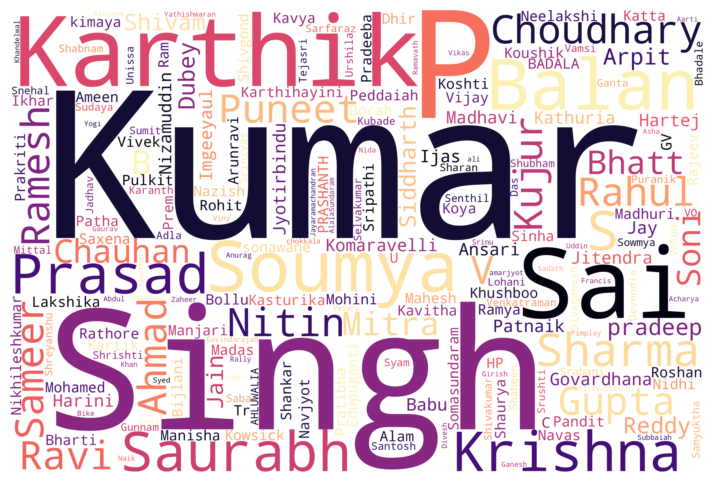

In [95]:
create_wordcloud(df_names,'Names')

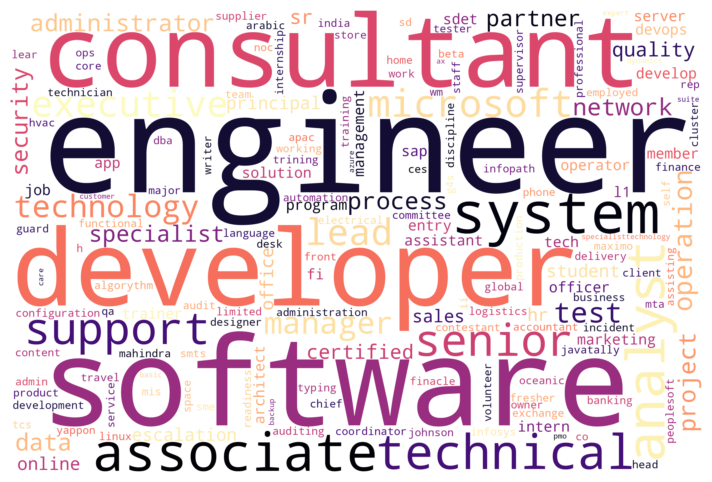

In [96]:
create_wordcloud(df_designation,'Designation')

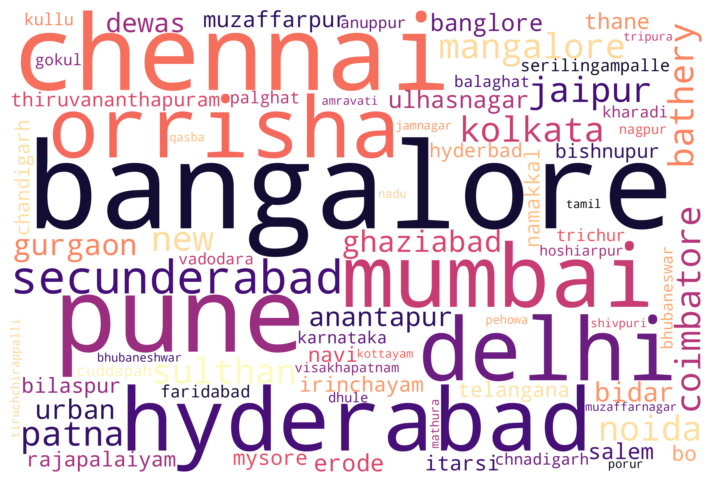

In [97]:
create_wordcloud(df_location,'Location')

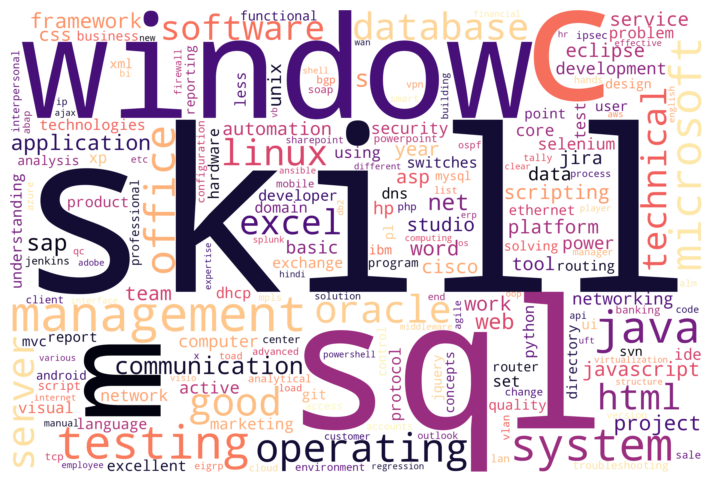

In [98]:
create_wordcloud(skills_df,'filtered_skill')

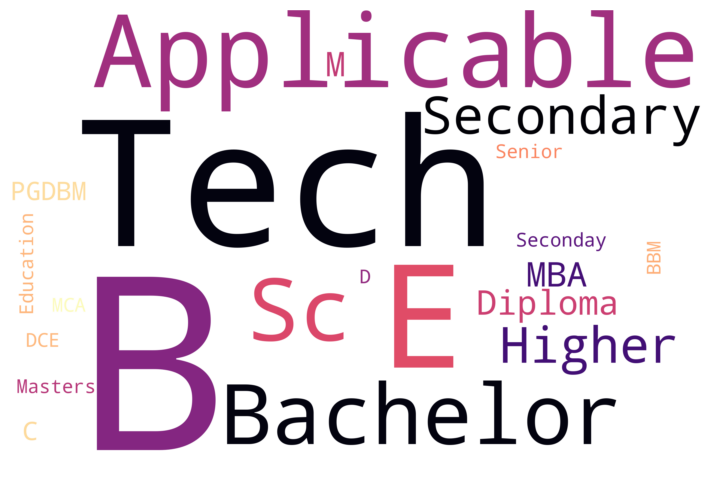

In [99]:
create_wordcloud(df_degrees_processed,'Qualification')

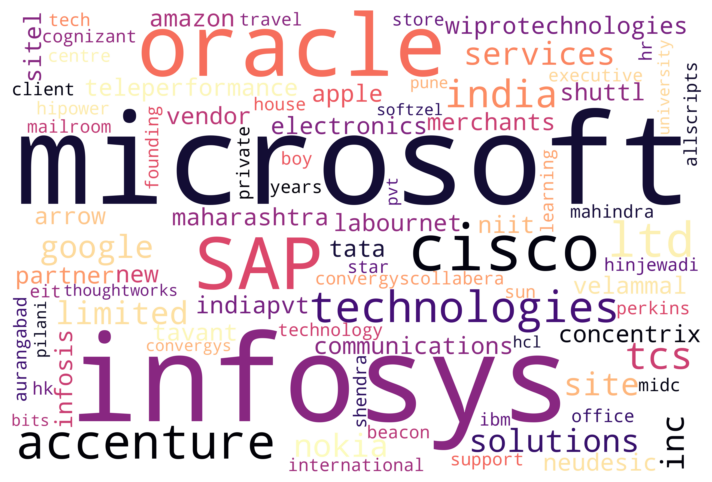

In [101]:

create_wordcloud(df_companies_worked_at,'Companies_worked_at')

# Entity Distribution



In [102]:
df_location.head()

,Location,Count
0,bangalore,34
1,hyderabad,20
3,pune,16
22,bangalore,8
5,chennai,7


In [103]:
# Group by Location and sum the counts
df_location_grouped = df_location.groupby('Location')['Count'].sum().reset_index()

# Sort the grouped DataFrame by count in descending order
df_location_grouped = df_location_grouped.sort_values(by='Count', ascending=False)

In [104]:
df_location_grouped.head()

,Location,Count
5,bangalore,44
27,hyderabad,21
55,pune,18
14,chennai,8
31,jaipur,4


<ipython-input-105-e62438975399>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Location', y='Count', data=top_locations, palette='Blues_r')


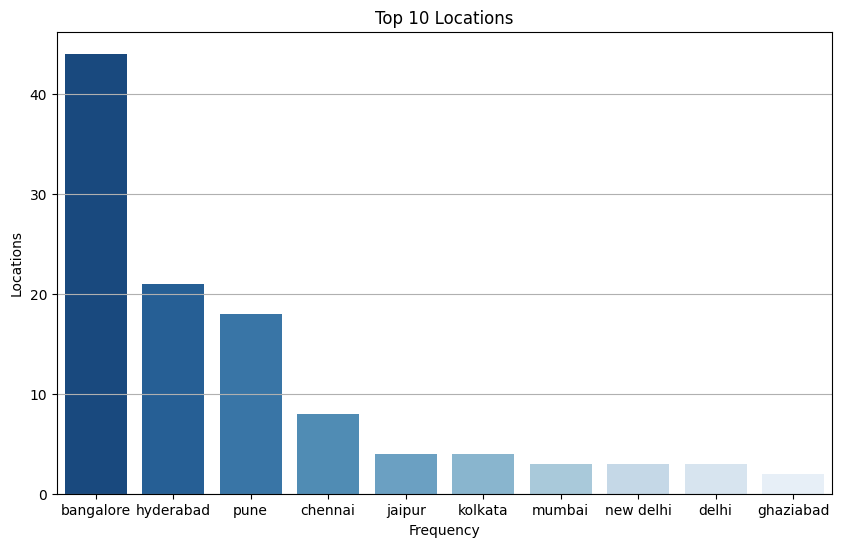

In [105]:
#Distribution of Locations

location_counts = df_location['Location'].value_counts()
# Plotting the top 10 locations
top_locations = df_location_grouped.head(10)
plt.figure(figsize=(10, 6))

sns.barplot(x='Location', y='Count', data=top_locations, palette='Blues_r')

plt.title('Top 10 Locations')
plt.xlabel('Frequency')
plt.ylabel('Locations')
plt.grid(axis='y')
plt.show()

In [106]:
grouped_df_designation = df_designation.groupby('Designation').size().reset_index(name='Count')
grouped_df_designation = grouped_df_designation.sort_values(by='Count', ascending=False)

In [107]:
grouped_df_designation.head()

,Designation,Count
98,software developer,28
108,system engineer,10
8,associate consultant,5
116,technical support engineer,4
122,test engineer,3


<ipython-input-108-6eab52a2d747>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Designation', data=top_designations, palette='Blues_r')


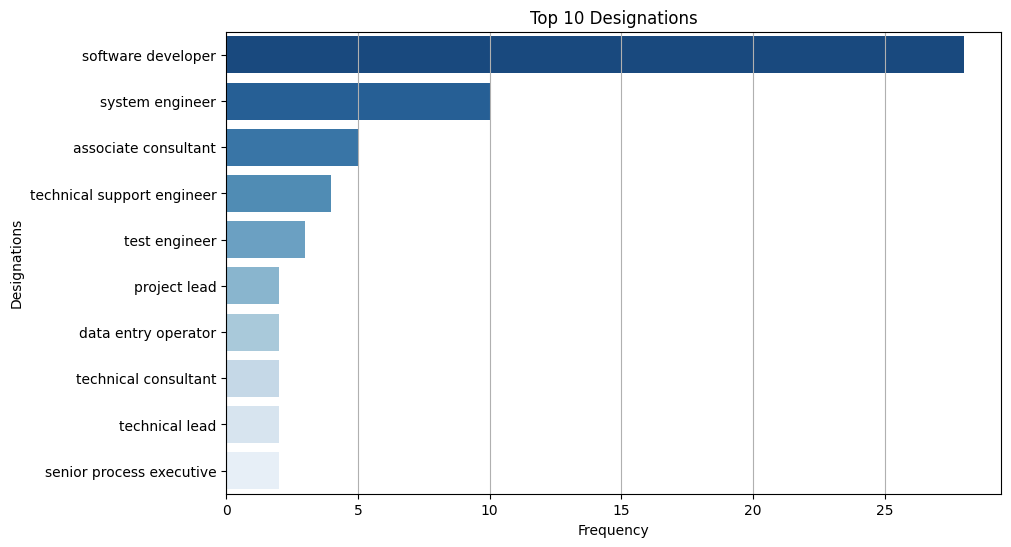

In [108]:
# Plotting the top 10 designations
top_designations = grouped_df_designation.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Designation', data=top_designations, palette='Blues_r')
plt.title('Top 10 Designations')
plt.xlabel('Frequency')
plt.ylabel('Designations')
plt.grid(axis='x')
plt.show()

In [109]:
skills_df.head()

,skill,filtered_skill
0,languages core java,core java
1,go lang,go lang
2,data structures & algorithms,data structures & algorithms
3,oracle,oracle
4,pl-sql programming,pl-sql


<ipython-input-110-f855a7869afb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='filtered_skill', y='Count', data=top_skills, palette='Blues_r')


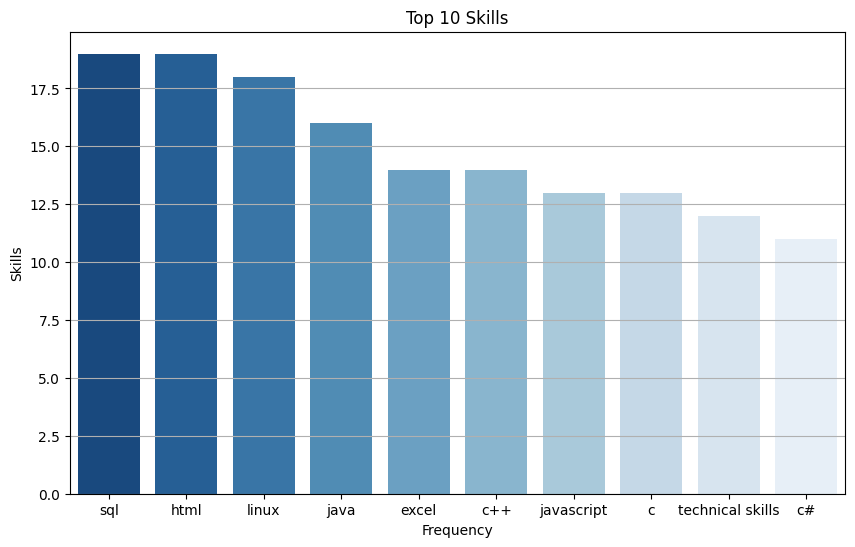

In [110]:
# Plotting the overall distribution of skills

grouped_skills_df= skills_df.groupby('filtered_skill').size().reset_index(name='Count')
grouped_skills_df = grouped_skills_df.sort_values(by='Count', ascending=False)

# Plotting the top 10 designations
top_skills= grouped_skills_df.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='filtered_skill', y='Count', data=top_skills, palette='Blues_r')
plt.title('Top 10 Skills')
plt.xlabel('Frequency')
plt.grid(axis='y')
plt.ylabel('Skills')
plt.show()

In [111]:
List_of_GradYear = get_annotation(all_annotaions, "Graduation Year")
df_GradYear = create_dataframe('GraduationYear', List_of_GradYear)
df_GradYear.head()

,GraduationYear,Count
0,2012,7
1,2016,6
2,2009,2
3,2011,7
4,2018,3


In [112]:
df_GradYear.isna().sum()

GraduationYear    0
Count             0
dtype: int64

In [113]:
grouped_gyear_df= df_GradYear.groupby('GraduationYear')['Count'].sum().reset_index()
grouped_gyear_df = grouped_gyear_df.sort_values(by='Count', ascending=False)

<ipython-input-114-3bd6bd18565c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='GraduationYear', data=grouped_gyear_df.head(10), palette='Blues_r')


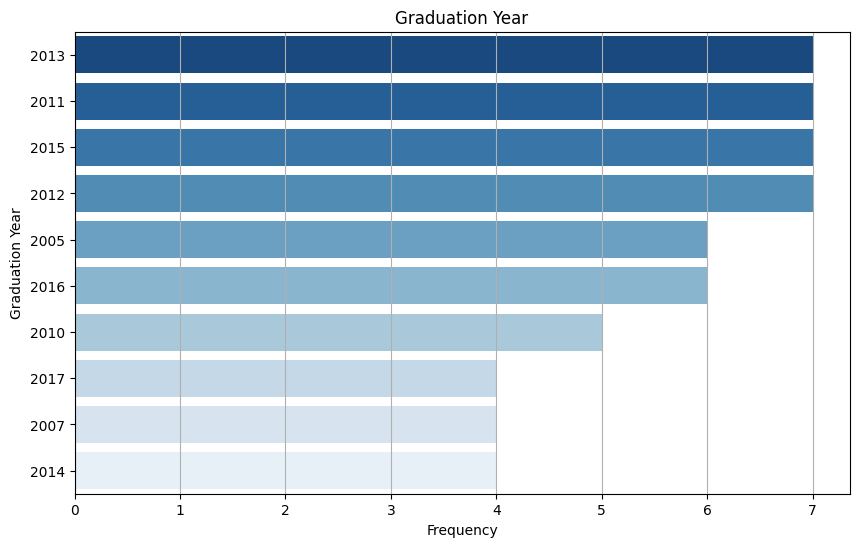

In [114]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='GraduationYear', data=grouped_gyear_df.head(10), palette='Blues_r')
plt.title('Graduation Year')
plt.xlabel('Frequency')
plt.ylabel('Graduation Year')
plt.grid(axis='x')
plt.show()

# Years of Expereince

In [115]:
List_of_ExpYear = get_annotation(all_annotaions, "Years of Experience")
df_ExpYear = create_dataframe('ExperienceYears', List_of_ExpYear)
df_ExpYear.head()

,ExperienceYears,Count
0,6 Yrs,1
1,3.2-years,1
2,4 year,1
3,6.5 years,1
4,3.5 years,1


In [116]:
def extract_years(text):
    # Remove non-numeric characters
    numeric_value = re.sub(r'[^\d.]+', '', text)
    return numeric_value

# Apply function to 'years' column
df_ExpYear['ExperienceYears'] = df_ExpYear['ExperienceYears'].apply(extract_years)

# Convert to float
df_ExpYear['ExperienceYears'] = df_ExpYear['ExperienceYears'].astype(float)


In [117]:
df_ExpYear.sample()

,ExperienceYears,Count
9,13.0,1


In [118]:
grouped_ExpYear_df= df_ExpYear.groupby('ExperienceYears')['Count'].sum().reset_index()
grouped_ExpYear_df = grouped_ExpYear_df.sort_values(by='Count', ascending=False)

In [119]:
grouped_ExpYear_df

,ExperienceYears,Count
9,6.0,4
4,3.0,3
7,4.0,3
6,3.5,2
1,2.0,2
11,7.0,2
12,8.0,2
0,1.0,1
14,12.0,1
19,511.0,1


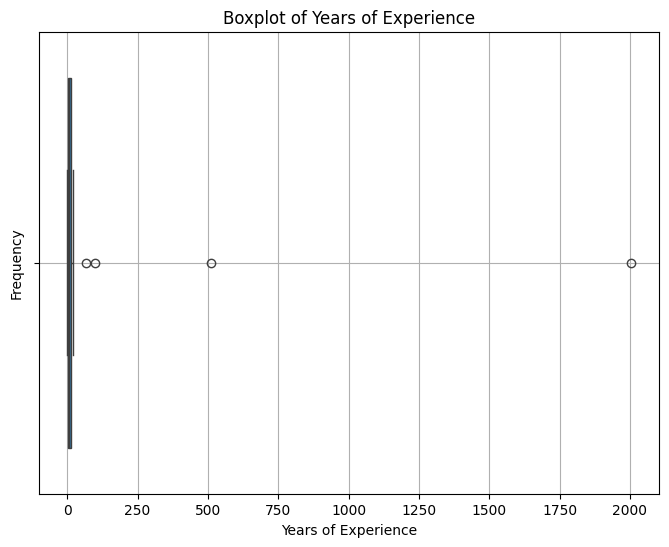

In [120]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=grouped_ExpYear_df, x='ExperienceYears')
plt.title('Boxplot of Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

There is some outliers in the Number of Years Experience. So we are removing data more than 70 years

In [121]:
def is_realistic(year):
    # Define your criteria for realistic years of experience
    return 0 < year <= 60
# Apply the filter
df_ExpYear_cleaned = df_ExpYear[df_ExpYear['ExperienceYears'].apply(is_realistic)]

# Convert 'years' column to numeric format (optional if already numeric)
df_ExpYear_cleaned['ExperienceYears'] = pd.to_numeric(df_ExpYear_cleaned['ExperienceYears'])

<ipython-input-121-5820429e7964>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ExpYear_cleaned['ExperienceYears'] = pd.to_numeric(df_ExpYear_cleaned['ExperienceYears'])


In [122]:
grouped_ExpYear_df= df_ExpYear_cleaned.groupby('ExperienceYears')['Count'].sum().reset_index()
grouped_ExpYear_df = grouped_ExpYear_df.sort_values(by='Count', ascending=False)

In [123]:
grouped_ExpYear_df

,ExperienceYears,Count
9,6.0,4
4,3.0,3
7,4.0,3
11,7.0,2
6,3.5,2
1,2.0,2
12,8.0,2
0,1.0,1
15,13.0,1
14,12.0,1


In [124]:
top_10_grouped_ExpYear_df= grouped_ExpYear_df.head(10)

<ipython-input-125-06827019cd34>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ExperienceYears', y='Count', data=top_10_grouped_ExpYear_df, palette='Blues')


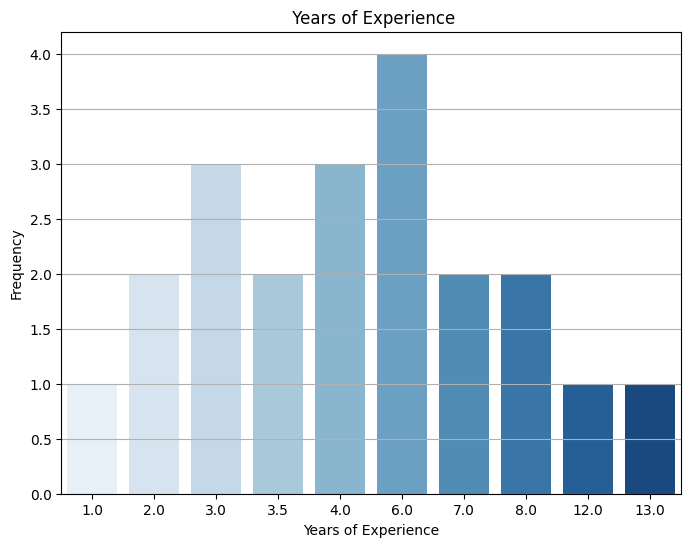

In [125]:
# Create the boxplot
plt.figure(figsize=(8, 6))
sns.barplot(x='ExperienceYears', y='Count', data=top_10_grouped_ExpYear_df, palette='Blues')
plt.title(' Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

<ipython-input-126-1902246a4eed>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Companies_worked_at', y='Count', data=df_companies_grouped.head(5),palette='Blues_r')


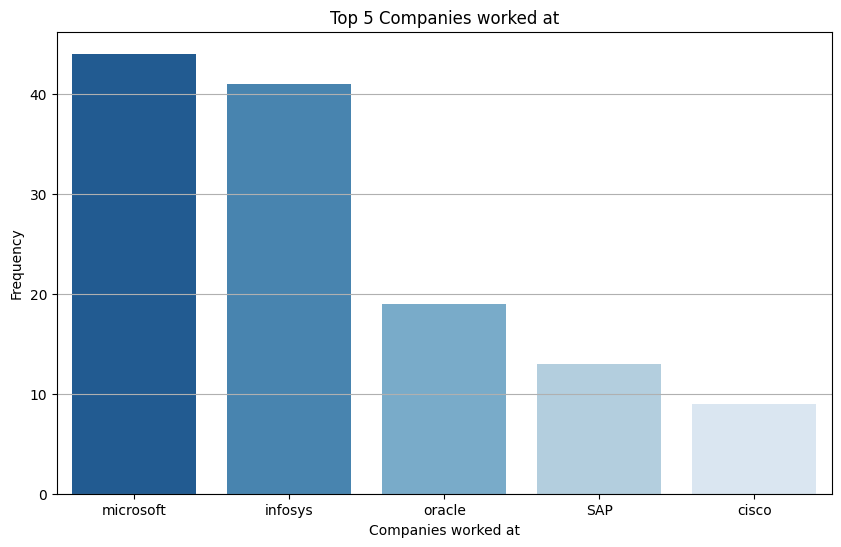

In [126]:
# Create the boxplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Companies_worked_at', y='Count', data=df_companies_grouped.head(5),palette='Blues_r')
plt.title('Top 5 Companies worked at')
plt.xlabel('Companies worked at')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# N gram

In [157]:
from nltk.util import ngrams

# Function to generate n-grams
def get_ngrams(text, n=2):
    text = str(text)
    n_grams = ngrams(text.split(), n)
    returnVal = []
    try:
        for grams in n_grams:
            returnVal.append('_'.join(grams))
    except(RuntimeError):
        pass
    return ' '.join(returnVal).strip()

# Function to count words
def word_count(text):
    words = text.split()
    return len(words)

In [158]:
import swifter
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

# add few columns
def feature_columns(data: pd.DataFrame, input_col: str) -> pd.DataFrame:
    # copy data
    df = data.copy()
    # length
    df['Length'] = df[input_col].str.len()
    # word count
    df['Word_count'] = df[input_col].apply(word_count)
    # mean word length
    df['mean_word_length'] = df[input_col].map(lambda rev: np.mean([len(word) for word in rev.split()]))
    # mean sentence length
    df['mean_sentence_length'] = df[input_col].map(lambda rev: np.mean([len(sent) for sent in sent_tokenize(rev)]))

    return df

# create n-gram
df_cleaned["bigram_text"] = df_cleaned['text_lower'].swifter.apply(get_ngrams, n=2)
df_cleaned["trigram_text"] = df_cleaned['text_lower'].swifter.apply(get_ngrams, n=3)
df_cleaned["quadgram_text"] = df_cleaned['text_lower'].swifter.apply(get_ngrams, n=4)

# generate new features e.g. length, word count and so on
final_df = feature_columns(df_cleaned, 'text_lower')

Pandas Apply:   0%|          | 0/197 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/197 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/197 [00:00<?, ?it/s]

In [159]:
final_df['text_lower'][0]

'govardhana k senior software engineer bengaluru karnataka karnataka   r govardhana k b2de315d95905b68 total experience 5 years 6 months cloud lending solutions inc 4 month salesforce developer oracle 5 years 2 month core java developer languages core java go lang oracle pl sql programming sales force developer apex designations promotions willing relocate anywhere work experience senior software engineer cloud lending solutions bangalore karnataka january 2018 present present senior consultant oracle bangalore karnataka november 2016 december 2017 staff consultant oracle bangalore karnataka january 2014 october 2016 associate consultant oracle bangalore karnataka november 2012 december 2013 education b e computer science engineering adithya institute technology tamil nadu september 2008 june 2012'

In [160]:
final_df.head()

,content,annotation,text_lower,bigram_text,trigram_text,quadgram_text,Length,Word_count,mean_word_length,mean_sentence_length
0,Govardhana K Senior Software Engineer Bengalur...,"[{'label': ['Companies worked at'], 'points': ...",govardhana k senior software engineer bengalur...,govardhana_k k_senior senior_software software...,govardhana_k_senior k_senior_software senior_s...,govardhana_k_senior_software k_senior_software...,807,108,6.462963,807.0
1,Harini Komaravelli Test Analyst Oracle Hyderab...,"[{'label': ['Companies worked at'], 'points': ...",harini komaravelli test analyst oracle hyderab...,harini_komaravelli komaravelli_test test_analy...,harini_komaravelli_test komaravelli_test_analy...,harini_komaravelli_test_analyst komaravelli_te...,748,100,6.470000,748.0
2,Hartej Kathuria Data Analyst Intern Oracle Ret...,"[{'label': ['Skills'], 'points': [{'start': 22...",hartej kathuria data analyst intern oracle ret...,hartej_kathuria kathuria_data data_analyst ana...,hartej_kathuria_data kathuria_data_analyst dat...,hartej_kathuria_data_analyst kathuria_data_ana...,1169,166,6.036145,1169.0
3,Ijas Nizamuddin Associate Consultant State Str...,"[{'label': ['Skills'], 'points': [{'start': 46...",ijas nizamuddin associate consultant state str...,ijas_nizamuddin nizamuddin_associate associate...,ijas_nizamuddin_associate nizamuddin_associate...,ijas_nizamuddin_associate_consultant nizamuddi...,1847,233,6.922747,1847.0
4,Imgeeyaul Ansari java developer Pune Maharasht...,"[{'label': ['Skills'], 'points': [{'start': 18...",imgeeyaul ansari java developer pune maharasht...,imgeeyaul_ansari ansari_java java_developer de...,imgeeyaul_ansari_java ansari_java_developer ja...,imgeeyaul_ansari_java_developer ansari_java_de...,1202,163,6.368098,1202.0


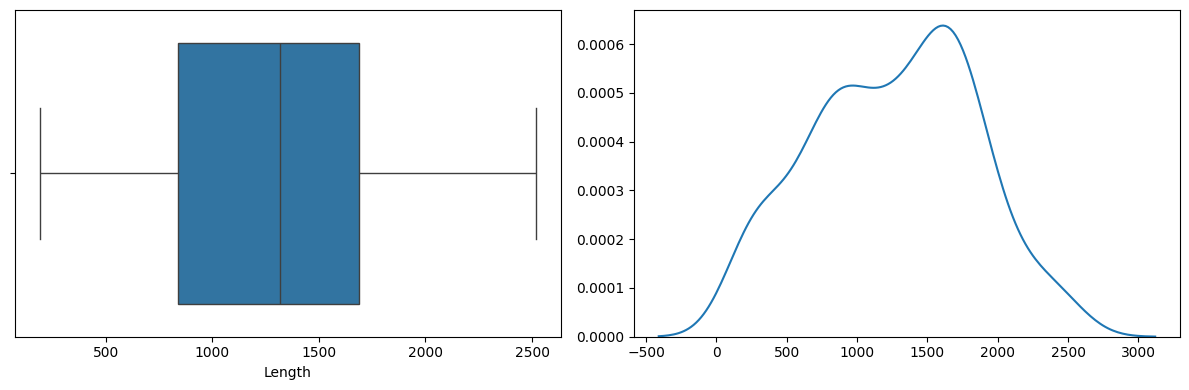

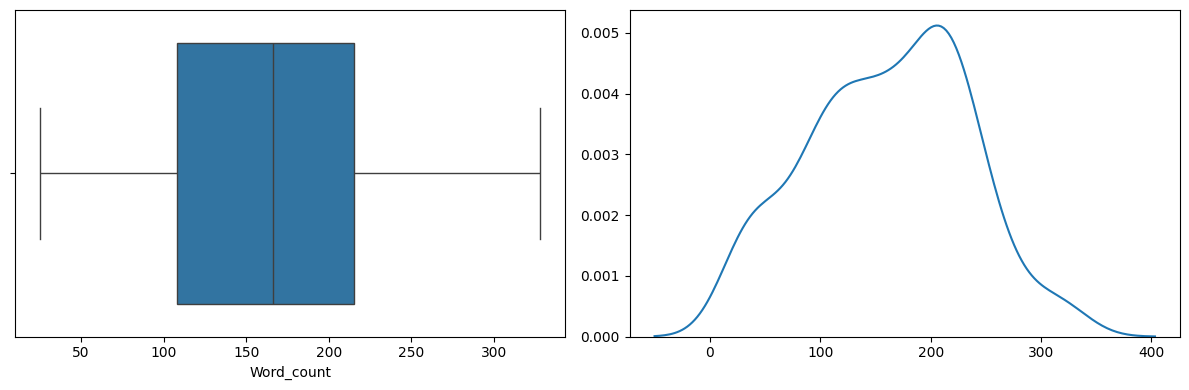

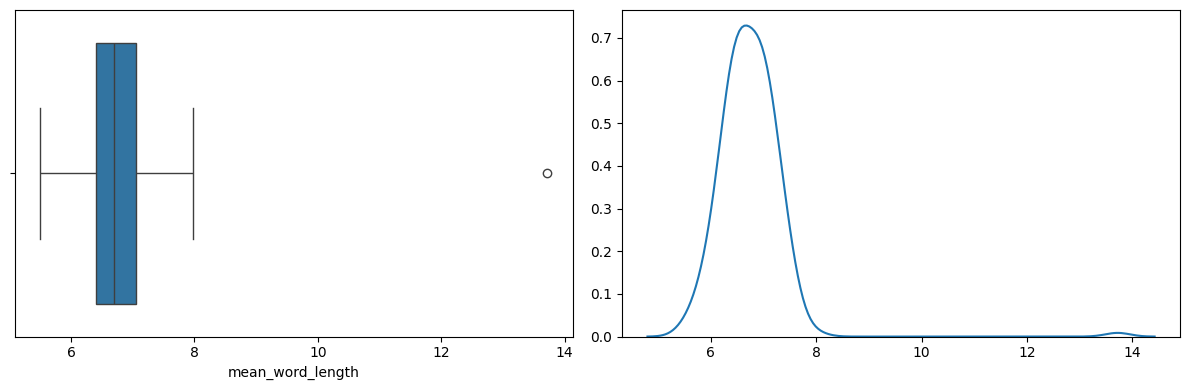

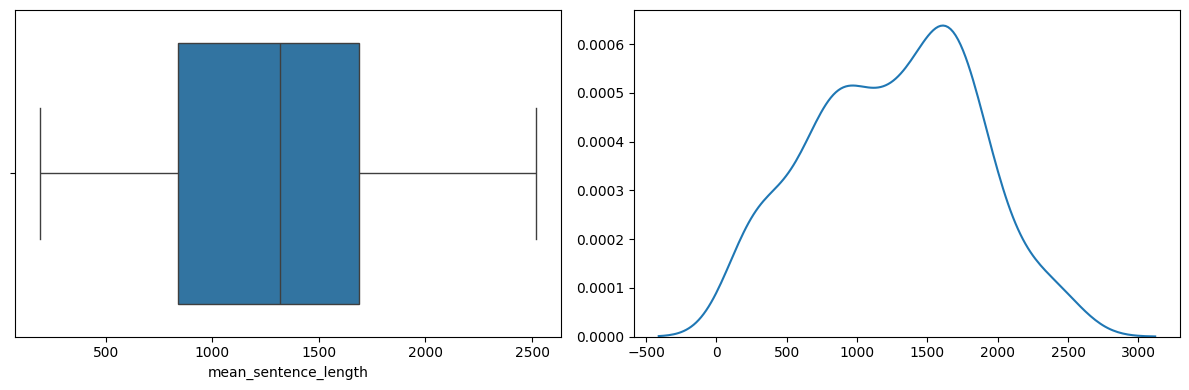

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_features(data: pd.DataFrame, col: str, legend: str):

    plt.rcParams["figure.figsize"] = [12, 4]
    plt.rcParams["figure.autolayout"] = True
    f, axes = plt.subplots(1, 2)

    # Check if legend column exists in data
    if legend in data.columns:
        sns.boxplot(data=data, x=col, hue=legend, ax=axes[0])
        sns.kdeplot(data=data, x=col, hue=legend, ax=axes[1])
        plt.legend(data[legend].unique())
    else:
        sns.boxplot(data=data, x=col, ax=axes[0])
        sns.kdeplot(data=data, x=col, ax=axes[1])

    plt.xlabel('')
    plt.ylabel('')
    plt.show()

# Example usage to visualize all features in final_df
features = final_df.columns.tolist()[6:]
for feature in features:
    visualize_features(final_df, feature, 'Category')


In [162]:
print('Length')
print("Skew: {}".format(final_df['Length'].skew()))
print("Kurtosis: {}".format(final_df['Length'].kurtosis()))

print('Word_count')
print("Skew: {}".format(final_df['Word_count'].skew()))
print("Kurtosis: {}".format(final_df['Word_count'].kurtosis()))

print('mean_sentence_length')
print("Skew: {}".format(final_df['mean_sentence_length'].skew()))
print("Kurtosis: {}".format(final_df['mean_sentence_length'].kurtosis()))

print('mean_word_length')
print("Skew: {}".format(final_df['mean_word_length'].skew()))
print("Kurtosis: {}".format(final_df['mean_word_length'].kurtosis()))


Length
Skew: -0.06565131633160598
Kurtosis: -0.7456745127392783
Word_count
Skew: -0.069037627782922
Kurtosis: -0.6159754686091685
mean_sentence_length
Skew: -0.06565131633160598
Kurtosis: -0.7456745127392783
mean_word_length
Skew: 5.644829021701885
Kurtosis: 58.287519208733556


In [133]:
print("Skew: {}".format(final_df['Word_count'].skew()))
print("Kurtosis: {}".format(final_df['Word_count'].kurtosis()))

Skew: 2.179215289068286
Kurtosis: 6.422543131531347


In [134]:
print("Skew: {}".format(final_df['mean_sentence_length'].skew()))
print("Kurtosis: {}".format(final_df['mean_sentence_length'].kurtosis()))

Skew: 3.99798297282937
Kurtosis: 21.292728549989324


In [135]:
print("Skew: {}".format(final_df['mean_word_length'].skew()))
print("Kurtosis: {}".format(final_df['mean_word_length'].kurtosis()))

Skew: 2.4868025633037867
Kurtosis: 6.48448218594171


In [136]:
# calculate outliers
from scipy.stats import zscore
Length_outliers = final_df[abs(zscore(final_df['Length'])) >= 3 ]
len(Length_outliers)

5

In [137]:
# create cloud
from PIL import Image  # Import Image from PIL or Pillow
import stylecloud
def create_stylecloud(data: list, file_name: str) -> Image:
    # Convert a list of strings to a single string
    data_string = ' '.join(data)

    # style cloud
    stylecloud.gen_stylecloud(text=data_string,
                            icon_name='fas fa-square',
                            colors='black',
                            background_color='white',
                            gradient='horizontal',
                            output_name=file_name,
                            collocations=True,
                            size=1024)

# bigram
create_stylecloud(final_df['bigram_text'], 'imdb_processing.png')

# Trigram
create_stylecloud(final_df['trigram_text'], 'imdb_processing_1.png')

In [168]:
# Function to get top N most frequent words
def get_top_n_words(corpus, n=None):
    word_freq = Counter(corpus.str.split().sum())
    return word_freq.most_common(n)# Function to get top N most frequent words


# visulaize common words
def visualize_common(data: pd.DataFrame, input_col: str, n: int):

    # get common words
    mostCommon = get_top_n_words(data[input_col])[:n]

    # get words and dictionary
    words = []
    freq = []
    for word, count in mostCommon:
        words.append(word)
        freq.append(count)

    return words, freq


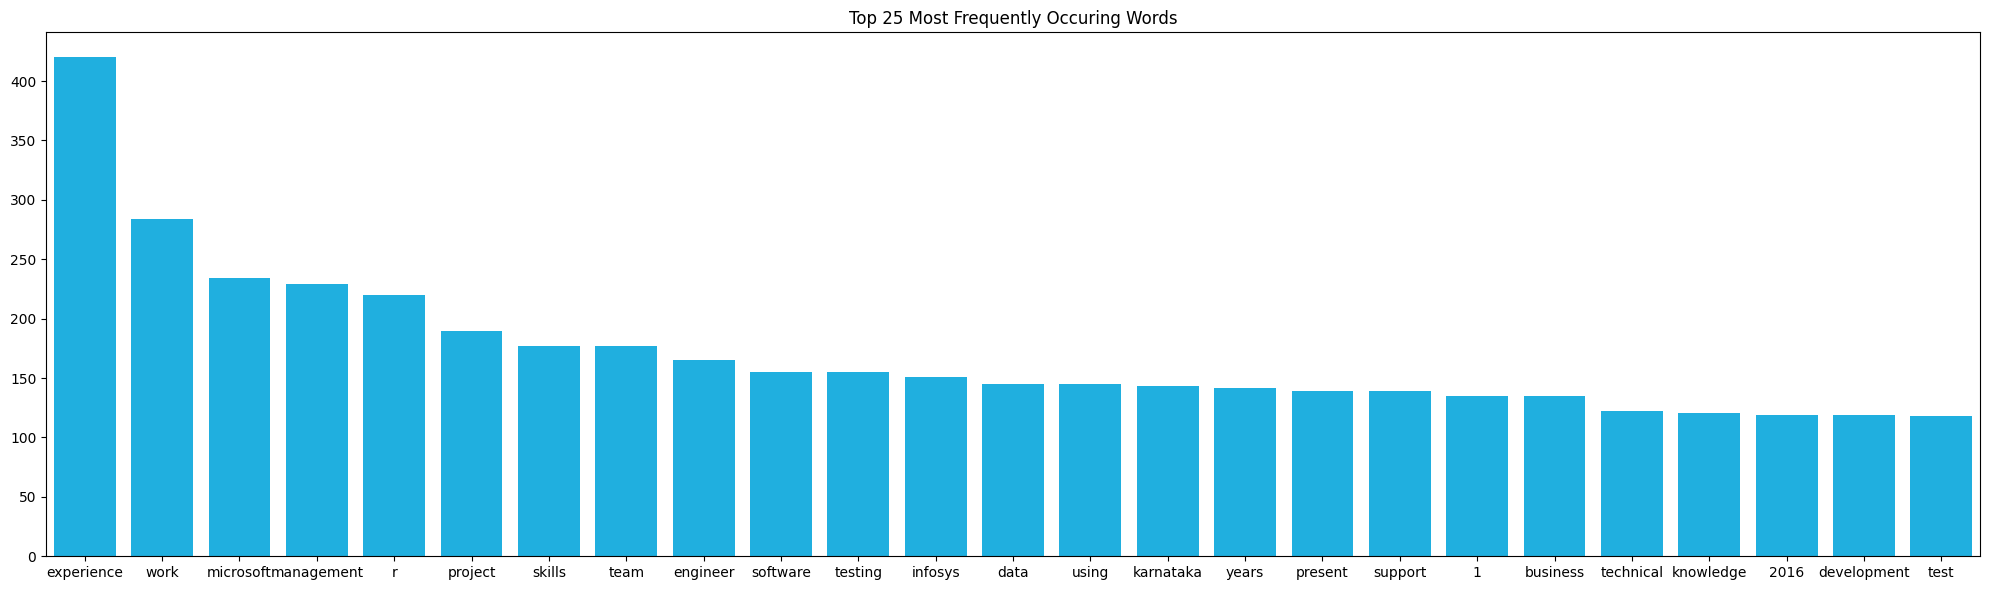

In [169]:
# common words Unigram
uni_word, uni_freq = visualize_common(final_df, 'text_lower', 25)

# plot
plt.rcParams["figure.figsize"] = [20, 6]
plt.rcParams["figure.autolayout"] = True
sns.barplot(x=uni_word, y=uni_freq, color='deepskyblue')
plt.title('Top 25 Most Frequently Occuring Words')
#plt.xticks(rotation=45)
plt.show()


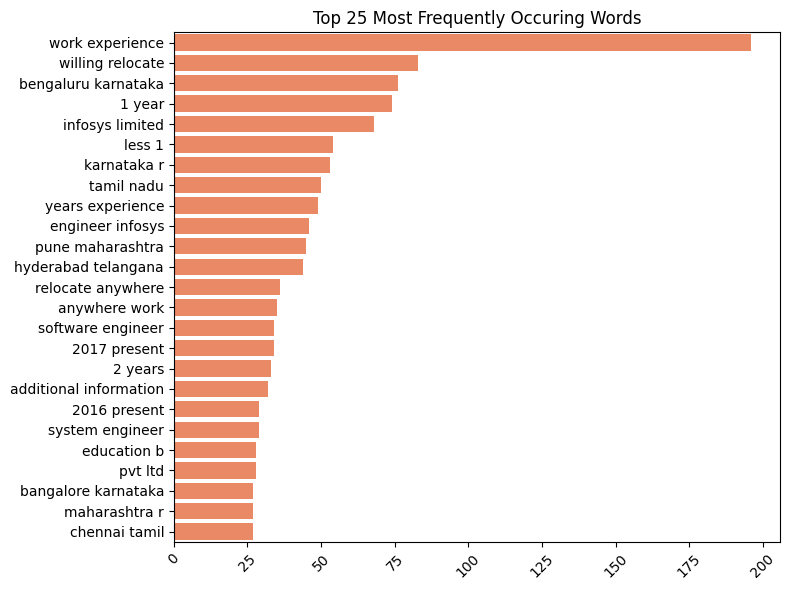

['work experience', 'willing relocate', 'bengaluru karnataka', '1 year', 'infosys limited', 'less 1', 'karnataka r', 'tamil nadu', 'years experience', 'engineer infosys', 'pune maharashtra', 'hyderabad telangana', 'relocate anywhere', 'anywhere work', 'software engineer', '2017 present', '2 years', 'additional information', '2016 present', 'system engineer', 'education b', 'pvt ltd', 'bangalore karnataka', 'maharashtra r', 'chennai tamil']


In [170]:
# commong words bigram
bi_word, bi_freq = visualize_common(final_df, 'bigram_text', 25)
bi_word = list(map(lambda x: x.replace('_', ' '), bi_word))

# plot
plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["figure.autolayout"] = True
sns.barplot(x=bi_freq, y=bi_word, color='coral')
plt.title('Top 25 Most Frequently Occuring Words')
plt.xticks(rotation=45)
plt.show()

print(bi_word)

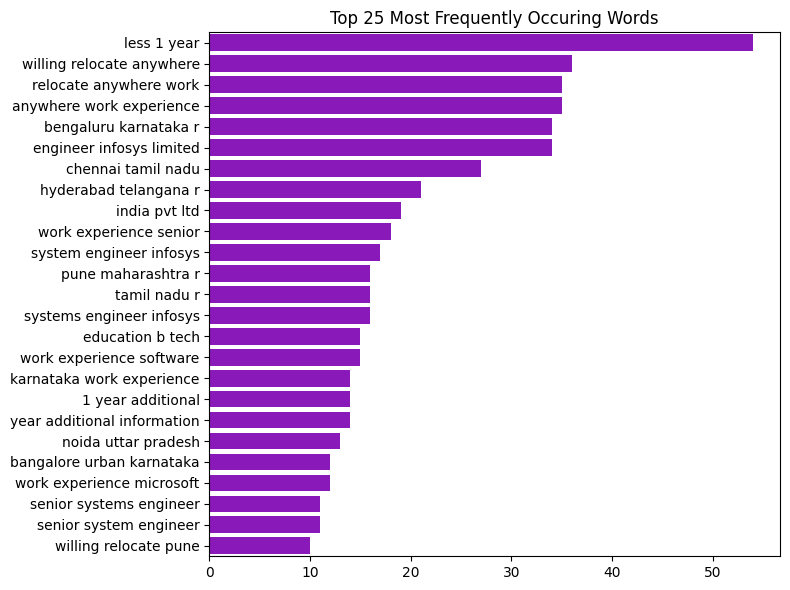

In [171]:
# commong words trigram
tri_word, tri_freq = visualize_common(final_df, 'trigram_text', 25)
tri_word = list(map(lambda x: x.replace('_', ' '), tri_word))

# plot
plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["figure.autolayout"] = True
sns.barplot(x=tri_freq, y=tri_word, color='darkviolet')
plt.title('Top 25 Most Frequently Occuring Words')
plt.show()

In [ ]:
!python -m spacy download en_core_web_sm


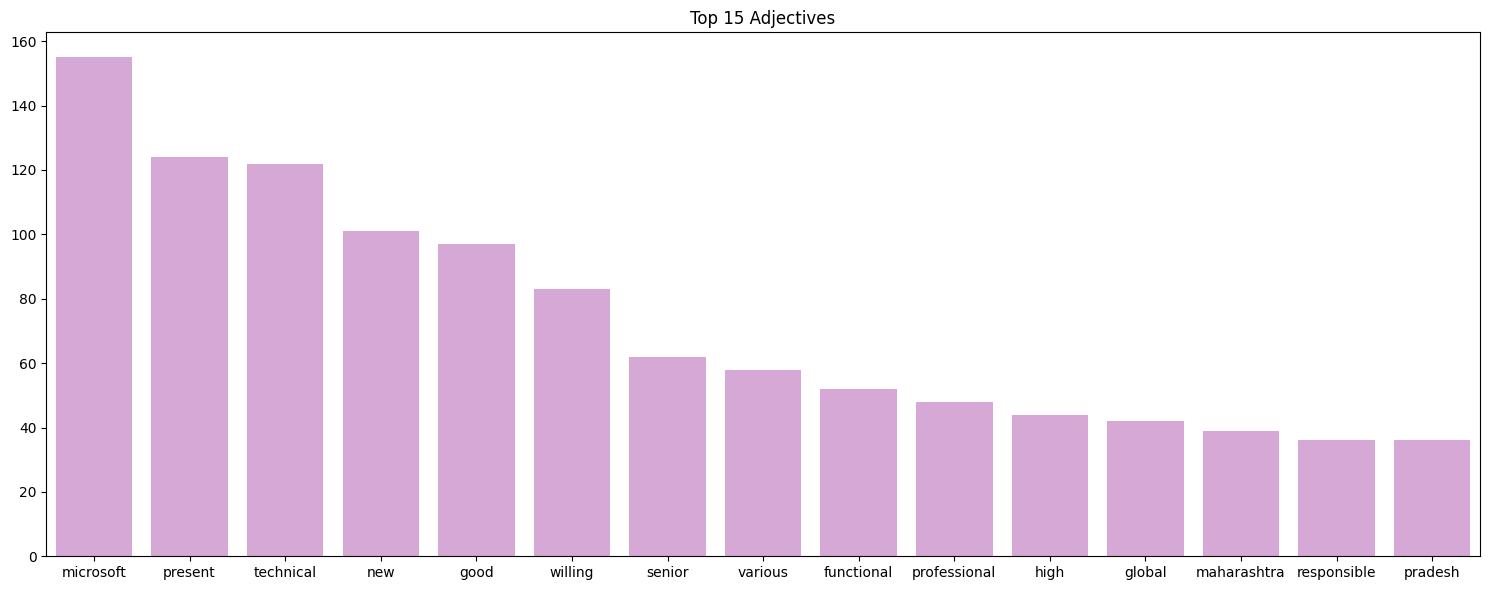

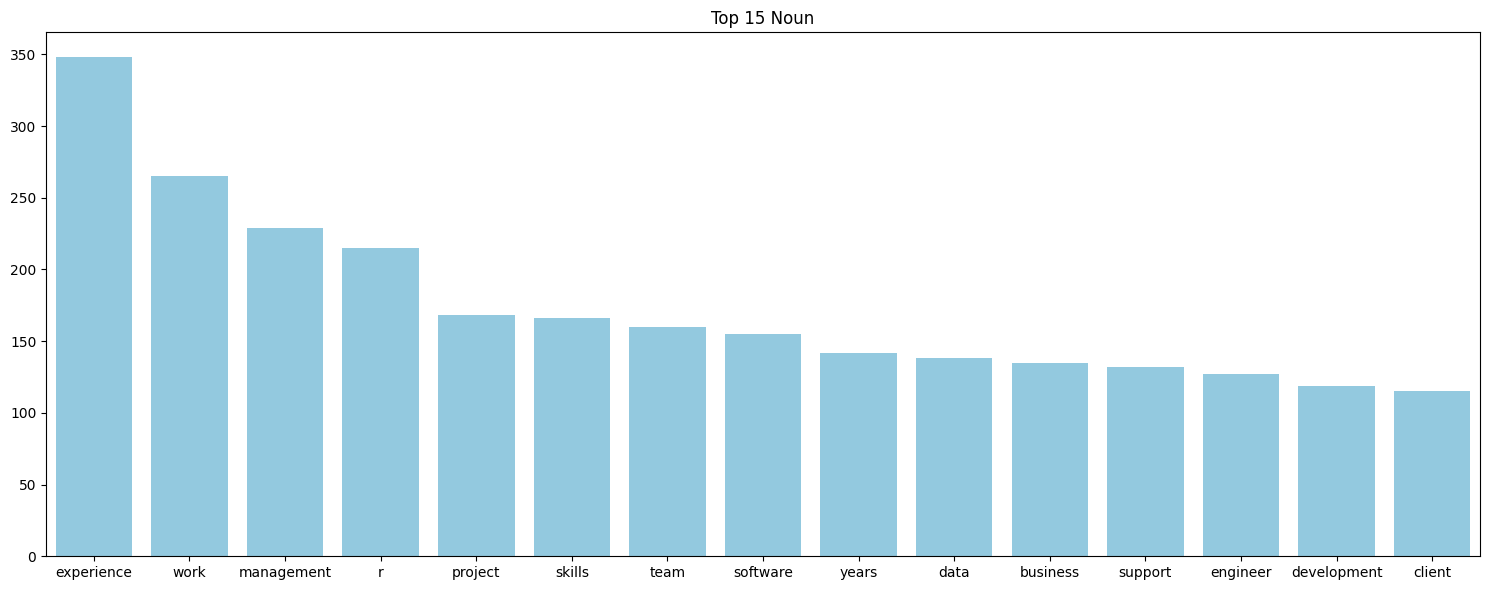

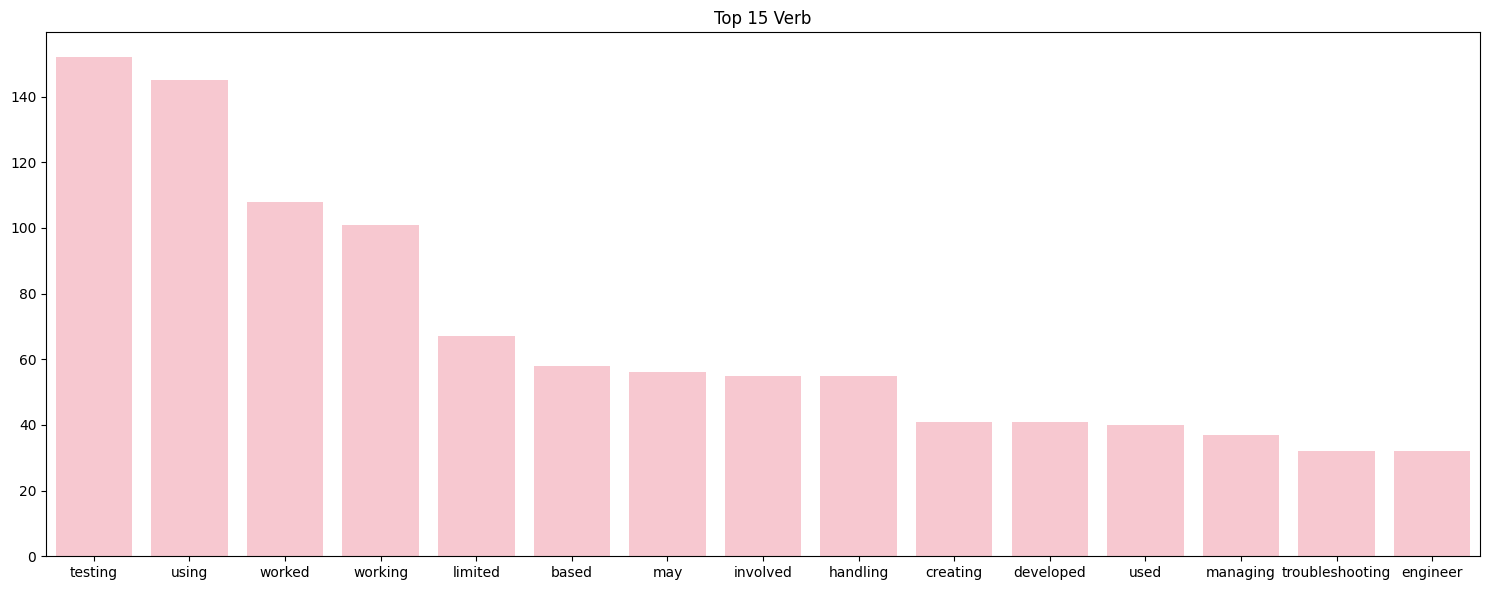

In [167]:
def pos_identification(data: pd.DataFrame, input_col: str, tag: str, sample: int, tag_count: int):
    # sample data
    df = data.head(sample)
    # create tokens
    tokens = word_tokenize(" ".join(df[input_col].values.tolist()))
    # create tags
    tags = nltk.pos_tag(tokens, tagset = "universal")
    # Get all tokens that are tagged as tags
    tags_list = [word for word, pos in tags if ((pos == tag) & ( word not in sw))]
    # Count most common adjectives
    most_common = Counter(tags_list).most_common(tag_count)
    # word and frequency
    words, frequency = [], []
    for word, count in most_common:
        words.append(word)
        frequency.append(count)
    return words, frequency

# pos_identification
adj_word_pos, adj_freq_pos = pos_identification(final_df, 'text_lower', 'ADJ', 3000, 15)
# plot
plt.rcParams["figure.figsize"] = [15, 6]
plt.rcParams["figure.autolayout"] = True
sns.barplot(x = adj_word_pos, y = adj_freq_pos, color='plum')
plt.title('Top 15 Adjectives')
plt.show()

# pos_identification
noun_word_pos, noun_freq_pos = pos_identification(final_df, 'text_lower', 'NOUN', 3000, 15)
# plot
plt.rcParams["figure.figsize"] = [15, 6]
plt.rcParams["figure.autolayout"] = True
sns.barplot(x =noun_word_pos , y = noun_freq_pos, color='skyblue')
plt.title('Top 15 Noun')
plt.show()

# pos_identification
verb_word_pos, verb_freq_pos = pos_identification(final_df, 'text_lower', 'VERB', 3000, 15)
# plot
plt.rcParams["figure.figsize"] = [15, 6]
plt.rcParams["figure.autolayout"] = True
sns.barplot(x =verb_word_pos, y = verb_freq_pos, color='pink')
plt.title('Top 15 Verb')
plt.show()

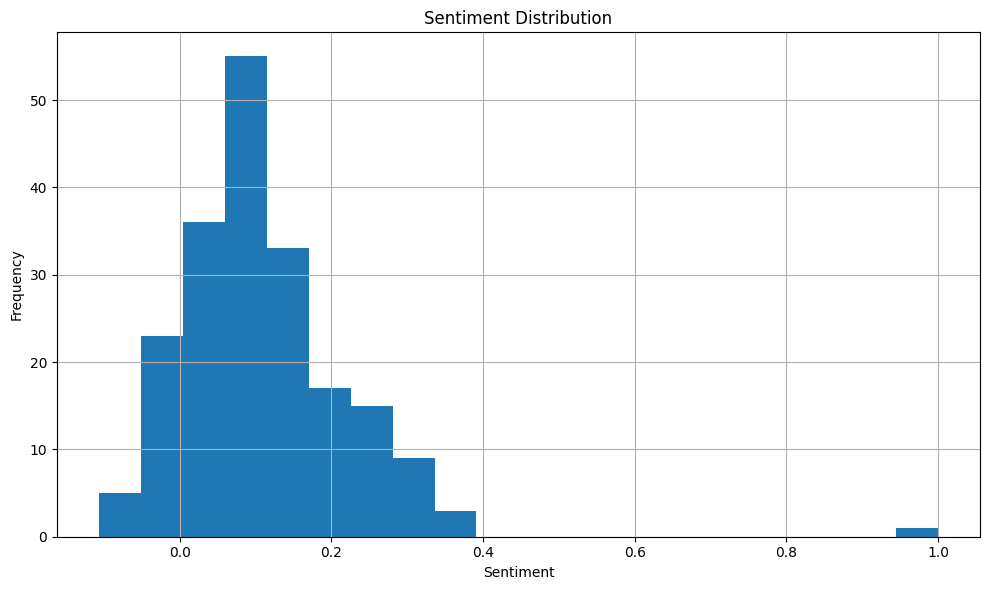

In [144]:
from textblob import TextBlob

# Sentiment analysis
final_df['Sentiment'] = final_df['text_lower'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
final_df['Sentiment'].hist(bins=20)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


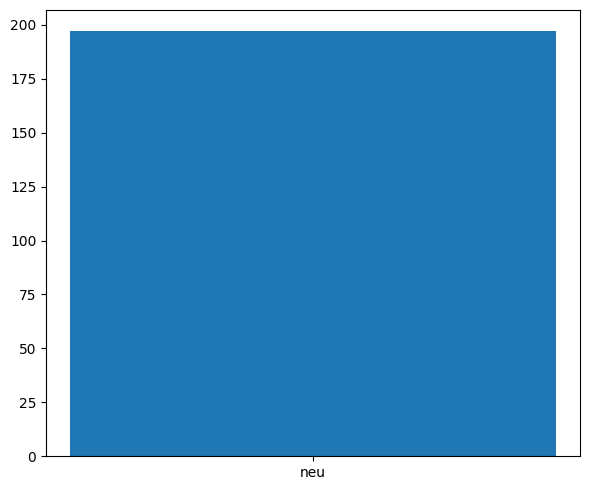

In [166]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


def sentiment_vader(text, sid):
    ss = sid.polarity_scores(text)
    ss.pop('compound')
    return max(ss, key=ss.get)

def sentiment_textblob(text):
        x = TextBlob(text).sentiment.polarity

        if x<0:
            return 'negative'
        elif x==0:
            return 'neutral'
        else:
            return 'positive'

def plot_sentiment_barchart(text, method='TextBlob'):
    if method == 'TextBlob':
        sentiment = text.map(lambda x: sentiment_textblob(x))
    elif method == 'Vader':
        nltk.download('vader_lexicon')
        sid = SentimentIntensityAnalyzer()
        sentiment = text.map(lambda x: sentiment_vader(x, sid=sid))
    else:
        raise ValueError('Textblob or Vader')
    plt.figure(figsize=(6, 5))
    plt.bar(sentiment.value_counts().index, sentiment.value_counts(), width=0.01)

plot_sentiment_barchart(final_df['text_lower'], method='Vader')

In [146]:
def get_sentiment_scores(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    return polarity, subjectivity

final_df[['Polarity', 'Subjectivity']] = final_df['text_lower'].apply(lambda x: pd.Series(get_sentiment_scores(x)))


final_df.head()

,content,annotation,text_lower,bigram_text,trigram_text,quadgram_text,Length,Word_count,mean_word_length,mean_sentence_length,Sentiment,Polarity,Subjectivity
0,Govardhana K Senior Software Engineer Bengalur...,"[{'label': ['Companies worked at'], 'points': ...",govardhana k\nsenior software engineer\n\nbeng...,govardhana_k k_senior senior_software software...,govardhana_k_senior k_senior_software senior_s...,govardhana_k_senior_software k_senior_software...,1840,216,7.342593,459.000000,0.013889,0.013889,0.277778
1,Harini Komaravelli Test Analyst Oracle Hyderab...,"[{'label': ['Companies worked at'], 'points': ...","harini komaravelli\ntest analyst at oracle, hy...",harini_komaravelli komaravelli_test test_analy...,harini_komaravelli_test komaravelli_test_analy...,harini_komaravelli_test_analyst komaravelli_te...,5198,727,6.090784,151.705882,0.217248,0.217248,0.394090
2,Hartej Kathuria Data Analyst Intern Oracle Ret...,"[{'label': ['Skills'], 'points': [{'start': 22...",hartej kathuria\ndata analyst intern - oracle ...,hartej_kathuria kathuria_data data_analyst ana...,hartej_kathuria_data kathuria_data_analyst dat...,hartej_kathuria_data_analyst kathuria_data_ana...,2568,372,5.822581,427.166667,0.046579,0.046579,0.469211
3,Ijas Nizamuddin Associate Consultant State Str...,"[{'label': ['Skills'], 'points': [{'start': 46...",ijas nizamuddin\nassociate consultant - state ...,ijas_nizamuddin nizamuddin_associate associate...,ijas_nizamuddin_associate nizamuddin_associate...,ijas_nizamuddin_associate_consultant nizamuddi...,4845,694,5.927954,178.333333,0.139046,0.139046,0.306365
4,Imgeeyaul Ansari java developer Pune Maharasht...,"[{'label': ['Skills'], 'points': [{'start': 18...","imgeeyaul ansari\njava developer\n\npune, maha...",imgeeyaul_ansari ansari_java java_developer de...,imgeeyaul_ansari_java ansari_java_developer ja...,imgeeyaul_ansari_java_developer ansari_java_de...,2168,309,5.893204,153.214286,0.005417,0.005417,0.230929


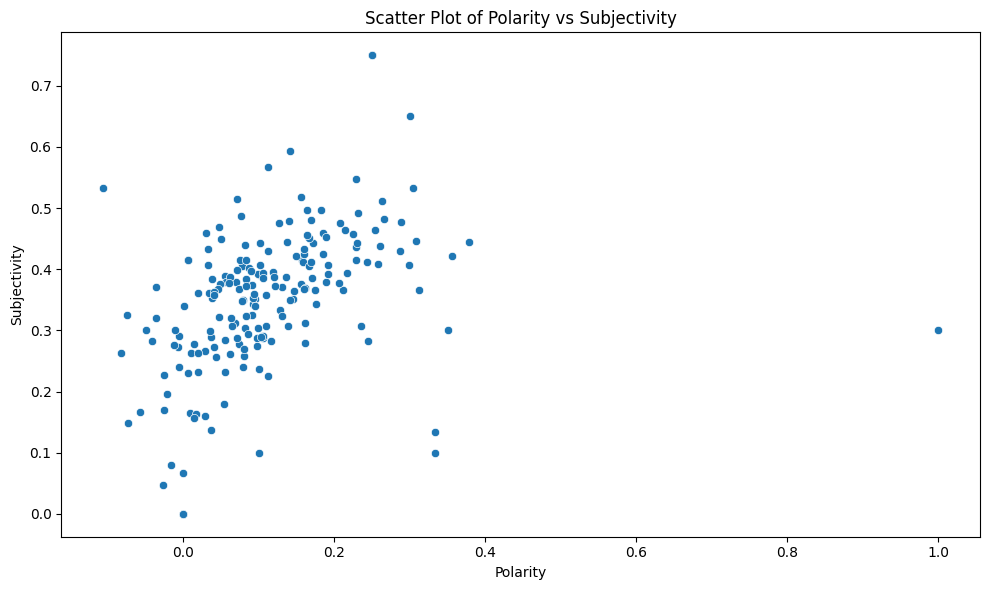

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_df, x='Polarity', y='Subjectivity')
plt.title('Scatter Plot of Polarity vs Subjectivity')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


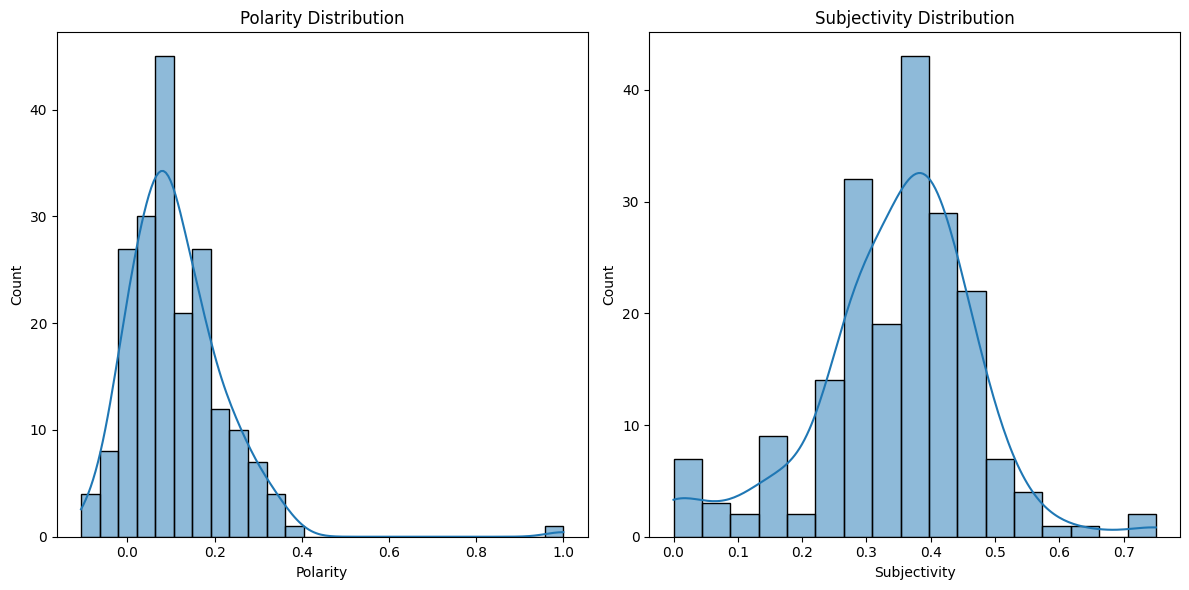

In [148]:
# Histograms with KDE
plt.figure(figsize=(12, 6))

# Polarity
plt.subplot(1, 2, 1)
sns.histplot(data=final_df, x='Polarity', kde=True)
plt.title('Polarity Distribution')
plt.xlabel('Polarity')

# Subjectivity
plt.subplot(1, 2, 2)
sns.histplot(data=final_df, x='Subjectivity', kde=True)
plt.title('Subjectivity Distribution')
plt.xlabel('Subjectivity')

plt.tight_layout()
plt.show()


In [149]:
# Example text
text = "govardhana k senior software engineer bengaluru karnataka karnataka   r govardhana k b2de315d95905b68 total experience 5 years 6 months cloud lending solutions inc 4 month salesforce developer oracle 5 years 2 month core java developer languages core java go lang oracle pl sql programming sales force developer apex designations promotions willing relocate anywhere work experience senior software engineer cloud lending solutions bangalore karnataka january 2018 present present senior consultant oracle bangalore karnataka november 2016 december 2017 staff consultant oracle bangalore karnataka january 2014 october 2016 associate consultant oracle bangalore karnataka november 2012 december 2013 education b e computer science engineering adithya institute technology tamil nadu september 2008 june 2012"

# Create a TextBlob object
blob = TextBlob(text)

# Compute polarity and subjectivity
polarity = blob.sentiment.polarity
subjectivity = blob.sentiment.subjectivity

print(f'Polarity: {polarity}, Subjectivity: {subjectivity}')


Polarity: 0.0625, Subjectivity: 0.375
